In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib .pyplot as plt
from statsmodels . datasets import get_rdataset
from sklearn. decomposition import PCA
from sklearn. preprocessing import StandardScaler
from ISLP import load_data
from plotnine import ggplot, aes, geom_bar, geom_histogram, labs, theme_minimal, theme, element_text, geom_line
import missingno as msno
import seaborn as sns






In [66]:
#git clone https://github.com/jujmar/pathologies.git


In [67]:
Patho = pd.read_csv("/Users/jeannegarcia/Downloads/effectifs.csv",  sep=';')
Patho

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,1,999,110.0,7290,1.523,"2,3",de 75 à 79 ans,hommes,31.0
1,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,2,972,120.0,7080,1.640,"2,3",de 75 à 79 ans,hommes,31.0
2,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,3,999,30.0,1590,1.638,"2,3",de 75 à 79 ans,hommes,31.0
3,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,4,999,250.0,10010,2.497,"2,3",de 75 à 79 ans,hommes,31.0
4,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,6,976,NaN,560,NaN,"2,3",de 75 à 79 ans,hommes,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,91,100.0,21390,0.472,3,de 70 à 74 ans,hommes,66.0
5216396,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,92,110.0,25370,0.414,3,de 70 à 74 ans,hommes,66.0
5216397,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,93,130.0,23030,0.569,3,de 70 à 74 ans,hommes,66.0
5216398,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,94,130.0,21920,0.575,3,de 70 à 74 ans,hommes,66.0


In [68]:
Patho.isna().sum()

annee                       0
patho_niv1                  0
patho_niv2             544320
patho_niv3            1179360
top                         0
cla_age_5                   0
sexe                        0
region                      0
dept                        0
Ntop                  1382435
Npop                        0
prev                  1382435
Niveau prioritaire      68040
libelle_classe_age          0
libelle_sexe                0
tri                     68040
dtype: int64

In [69]:
Patho.replace(["", "NA", "N/A", "-"], np.nan, inplace=True)

In [70]:
Patho.columns 
Patho.describe


<bound method NDFrame.describe of          annee                       patho_niv1                    patho_niv2  \
0         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
1         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
2         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
3         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
4         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
...        ...                              ...                           ...   
5216395   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216396   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216397   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216398   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216399   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébr

In [71]:
miss_values = (Patho.isna().sum()/ len(Patho)) * 100
print(miss_values)

annee                  0.000000
patho_niv1             0.000000
patho_niv2            10.434783
patho_niv3            22.608696
top                    0.000000
cla_age_5              0.000000
sexe                   0.000000
region                 0.000000
dept                   0.000000
Ntop                  26.501706
Npop                   0.000000
prev                  26.501706
Niveau prioritaire     1.304348
libelle_classe_age     0.000000
libelle_sexe           0.000000
tri                    1.304348
dtype: float64


In [72]:
Patho.dtypes

annee                   int64
patho_niv1             object
patho_niv2             object
patho_niv3             object
top                    object
cla_age_5              object
sexe                    int64
region                  int64
dept                   object
Ntop                  float64
Npop                    int64
prev                  float64
Niveau prioritaire     object
libelle_classe_age     object
libelle_sexe           object
tri                   float64
dtype: object

In [73]:
Patho.Npop

0           7290
1           7080
2           1590
3          10010
4            560
           ...  
5216395    21390
5216396    25370
5216397    23030
5216398    21920
5216399    19140
Name: Npop, Length: 5216400, dtype: int64

In [75]:
display(Patho['patho_niv3'].unique())


array(['Maladie valvulaire',
       'Troubles du rythme ou de la conduction cardiaque',
       'Maladies du foie ou du pancréas (hors mucoviscidose)',
       'Traitements antidépresseurs ou thymorégulateurs (hors pathologies)',
       'Traitements anxiolytiques (hors pathologies)',
       'Traitements hypolipémiants (hors pathologies)', nan,
       'Traitements antihypertenseurs (hors pathologies)',
       'Traitements hypnotiques (hors pathologies)',
       'Traitements neuroleptiques (hors pathologies)',
       "Affections de longue durée (dont 31 et 32) pour d'autres causes",
       'Autres cancers actifs', 'Autres cancers sous surveillance',
       'Cancer bronchopulmonaire actif', 'Total consommants tous régimes',
       'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
       'Maladies respiratoires chroniques (hors mucoviscidose)',
       'Maternité (avec ou sans pathologies)',
       'Pas de pathologie repérée, trai

In [76]:
Patho_filtre = Patho[Patho["patho_niv1"].isin(["Maladies cardioneurovasculaires","Maladies du foie ou du pancréas (hors mucoviscidose)","Cancers","Maladies inflammatoires ou rares ou infection VIH","Maladies respiratoires chroniques (hors mucoviscidose)","Maladies neurologiques","Affections de longue durée (dont 31 et 32) pour d'autres causes" ])]

In [ ]:
Patho_filtre

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,1,999,110.0,7290,1.523,"2,3",de 75 à 79 ans,hommes,31.0
1,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,2,972,120.0,7080,1.640,"2,3",de 75 à 79 ans,hommes,31.0
2,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,3,999,30.0,1590,1.638,"2,3",de 75 à 79 ans,hommes,31.0
3,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,4,999,250.0,10010,2.497,"2,3",de 75 à 79 ans,hommes,31.0
4,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,6,976,NaN,560,NaN,"2,3",de 75 à 79 ans,hommes,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,91,100.0,21390,0.472,3,de 70 à 74 ans,hommes,66.0
5216396,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,92,110.0,25370,0.414,3,de 70 à 74 ans,hommes,66.0
5216397,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,93,130.0,23030,0.569,3,de 70 à 74 ans,hommes,66.0
5216398,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,94,130.0,21920,0.575,3,de 70 à 74 ans,hommes,66.0


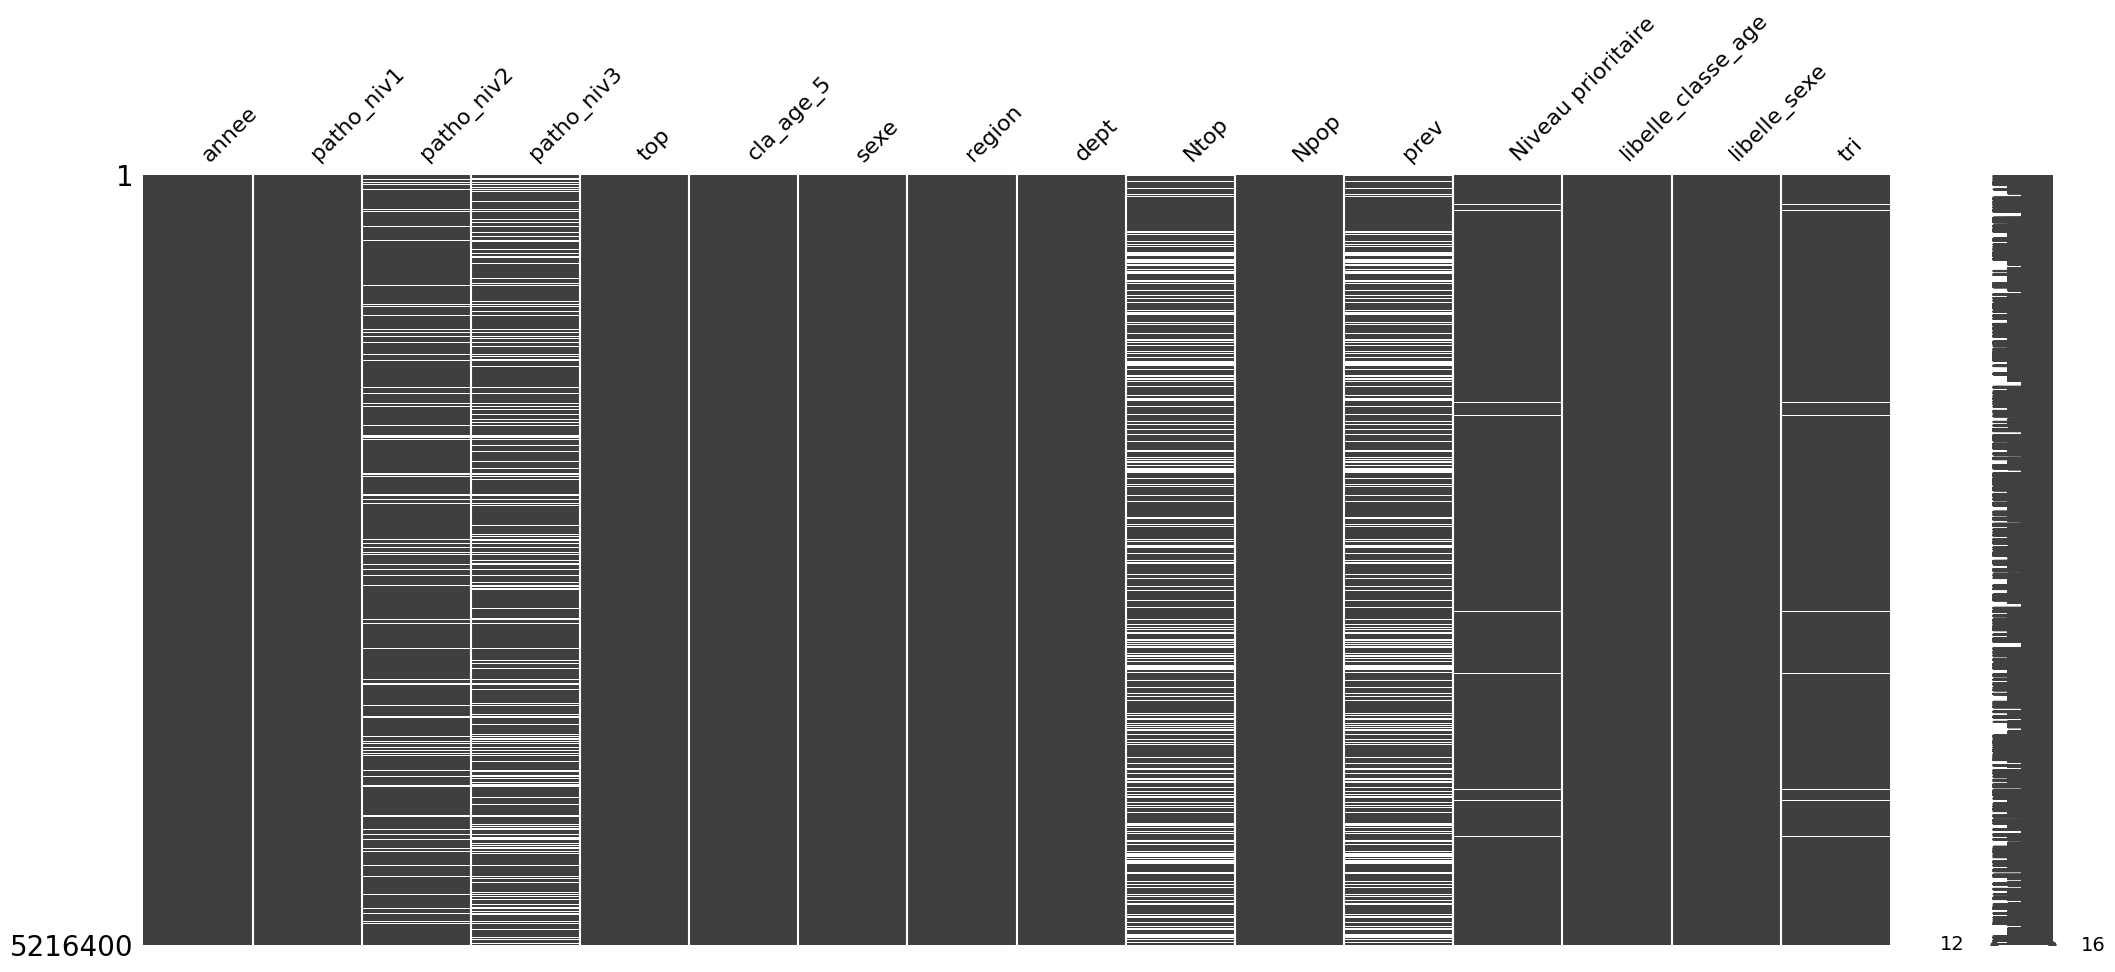

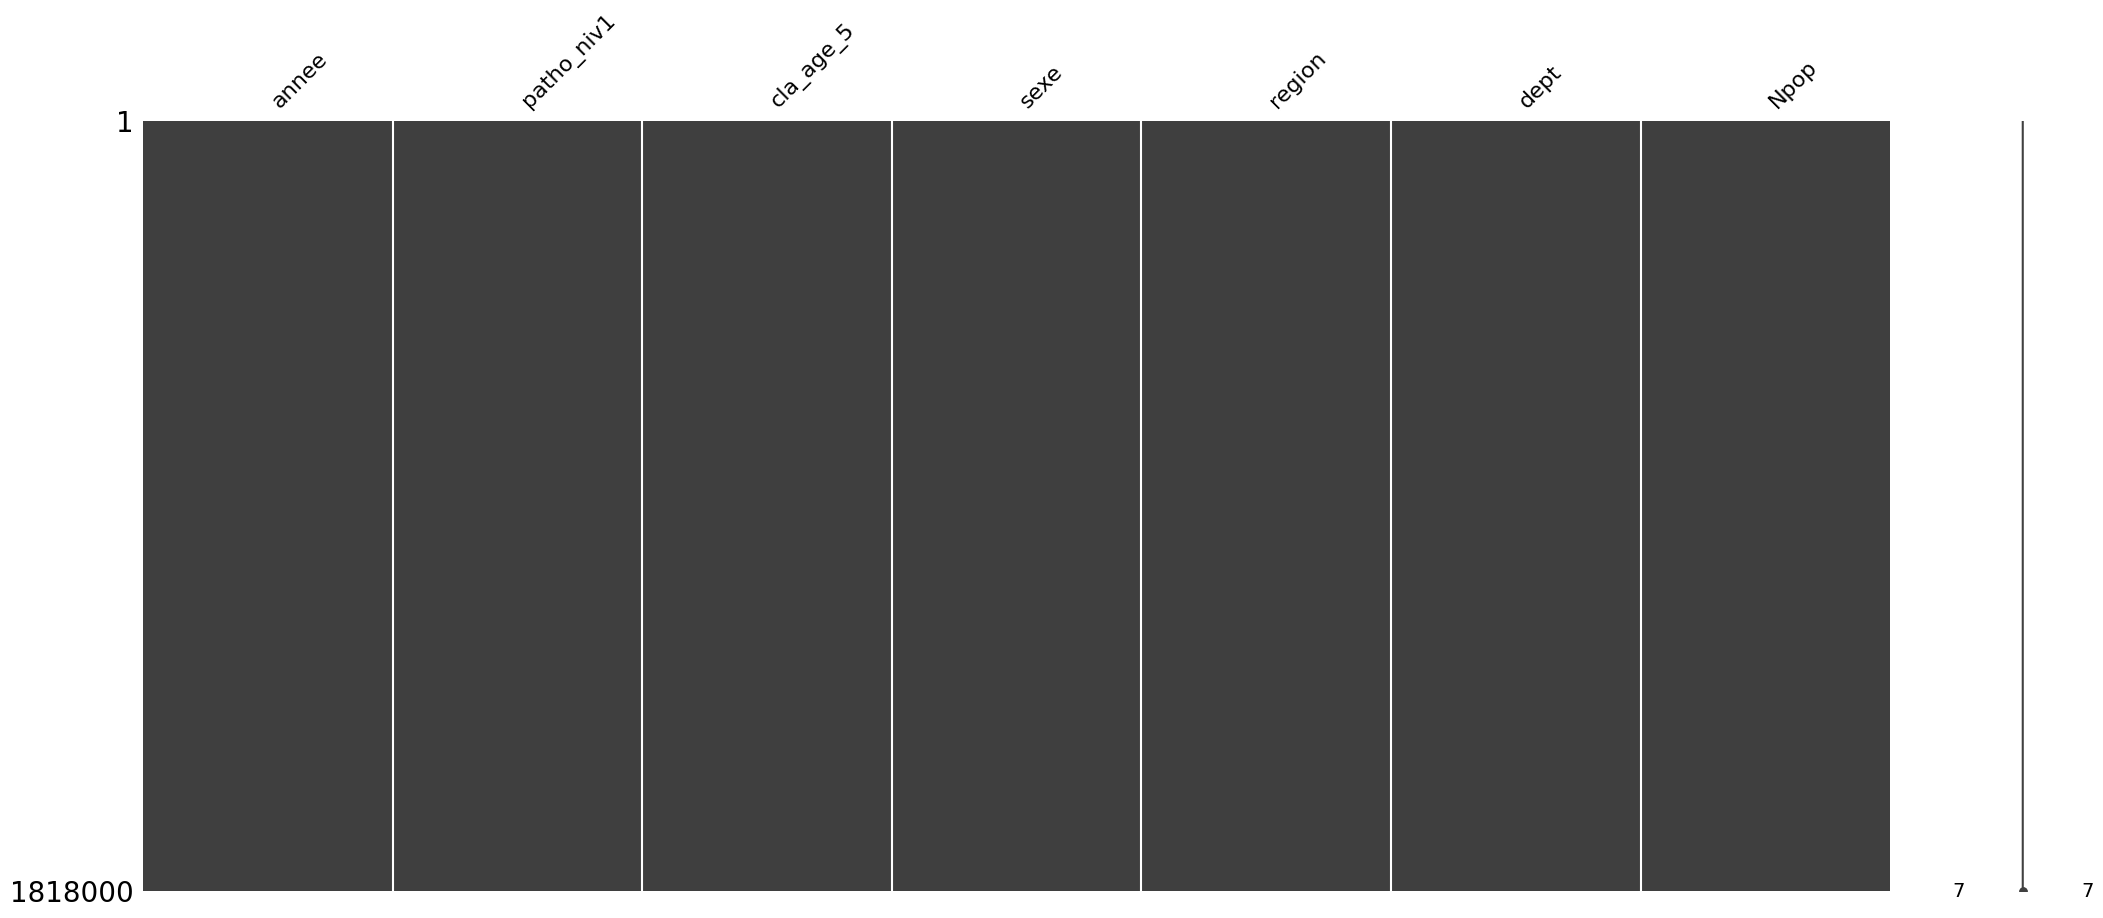

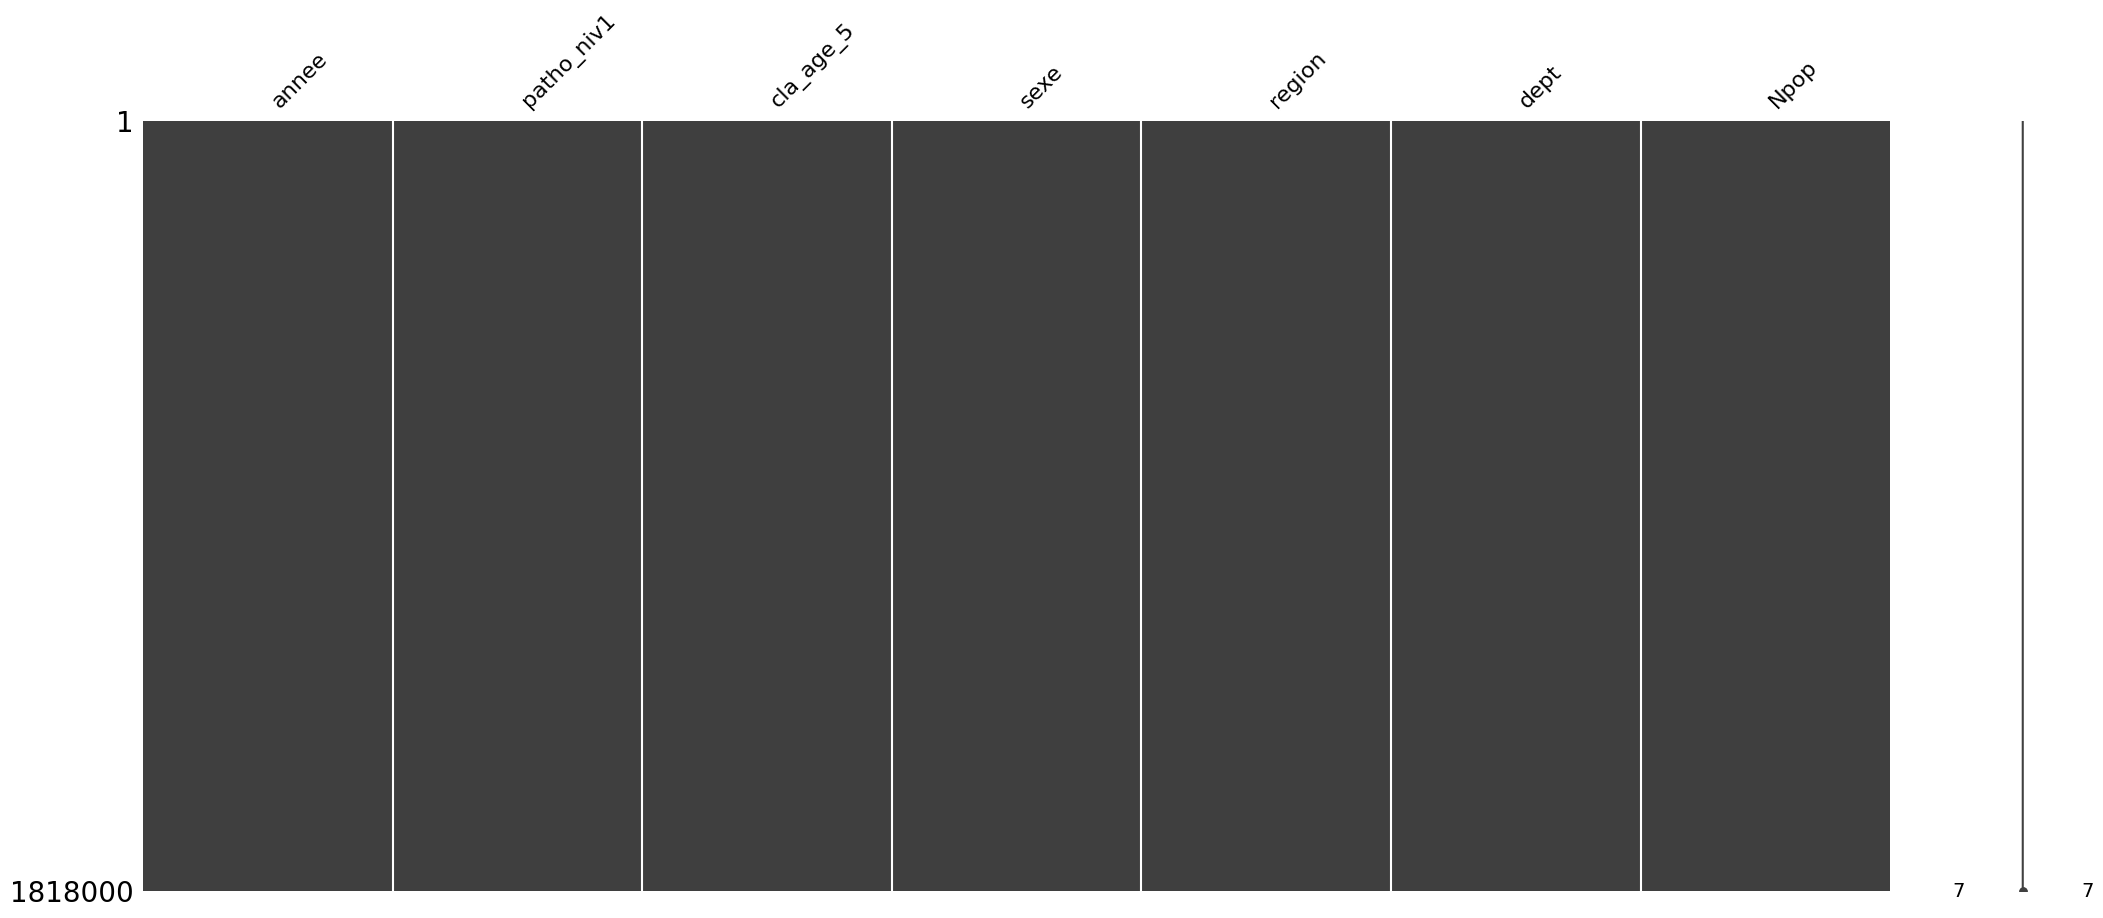

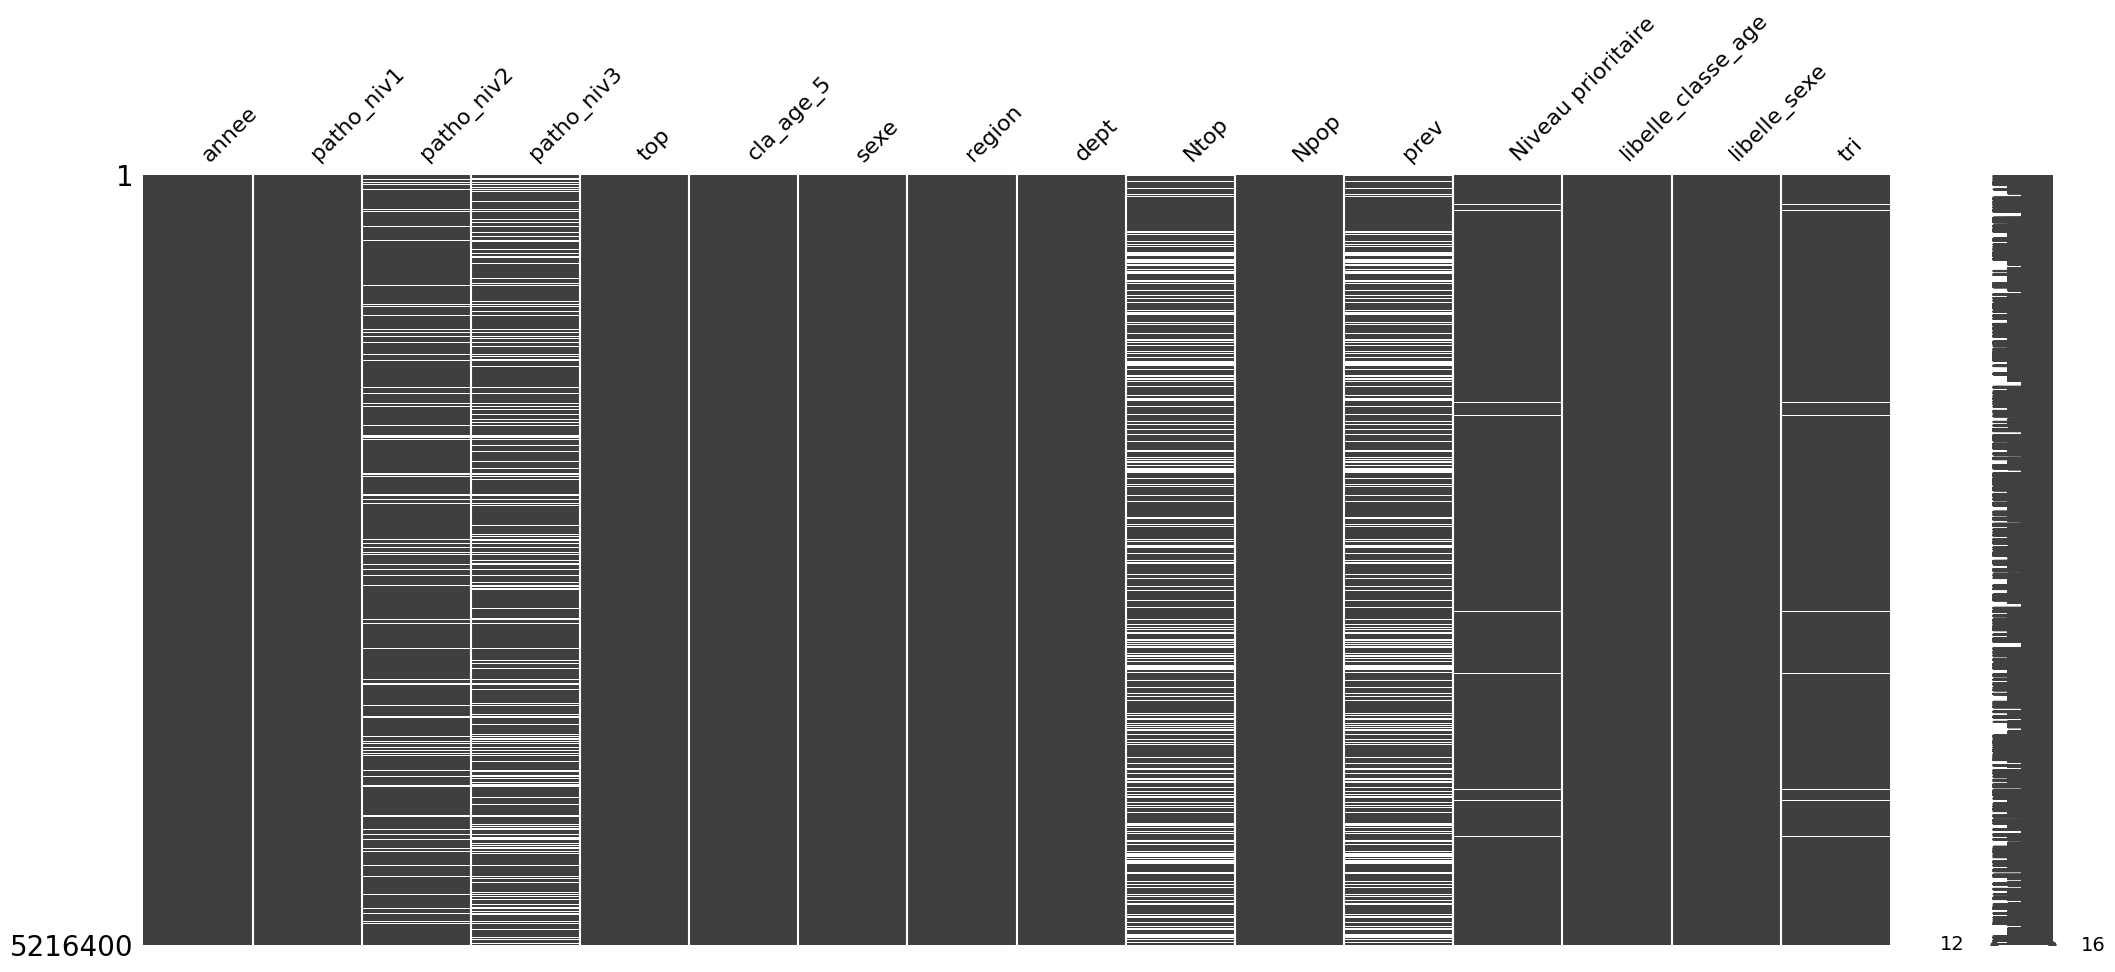

In [229]:
msno.matrix(Patho)
plt.show()


In [ ]:
#1 = homme / 
Patho_filtre = Patho_filtre[['annee', 'patho_niv1','cla_age_5','sexe','region','dept','Npop']]
Patho_filtre
#penser que dans chaque ligne c'est un nb de pop touche dans 1 dept, 

,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
0,2023,Maladies cardioneurovasculaires,75-79,1,1,999,7290
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
2,2023,Maladies cardioneurovasculaires,75-79,1,3,999,1590
3,2023,Maladies cardioneurovasculaires,75-79,1,4,999,10010
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [79]:
Patho_filtre.to_csv("/Users/jeannegarcia/Patho.csv", index=False, encoding='utf-8')

In [80]:
Patho_filtre = Patho_filtre[Patho_filtre['sexe'].isin([0, 1, 2])]
Patho_filtre

,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
0,2023,Maladies cardioneurovasculaires,75-79,1,1,999,7290
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
2,2023,Maladies cardioneurovasculaires,75-79,1,3,999,1590
3,2023,Maladies cardioneurovasculaires,75-79,1,4,999,10010
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [81]:
Patho_group = Patho_filtre.groupby(['dept', 'sexe','cla_age_5',	'annee', 'patho_niv1'], as_index=False)['Npop'].sum()
Patho_group



,dept,sexe,cla_age_5,annee,patho_niv1,Npop
0,01,1,00-04,2015,Affections de longue durée (dont 31 et 32) pou...,18340
1,01,1,00-04,2015,Cancers,238420
2,01,1,00-04,2015,Maladies cardioneurovasculaires,275100
3,01,1,00-04,2015,Maladies du foie ou du pancréas (hors mucovisc...,18340
4,01,1,00-04,2015,Maladies inflammatoires ou rares ou infection VIH,201740
...,...,...,...,...,...,...
269887,999,2,tsage,2023,Maladies cardioneurovasculaires,1049834550
269888,999,2,tsage,2023,Maladies du foie ou du pancréas (hors mucovisc...,69988970
269889,999,2,tsage,2023,Maladies inflammatoires ou rares ou infection VIH,769878670
269890,999,2,tsage,2023,Maladies neurologiques,559911760


In [82]:
tent= Patho_filtre.groupby(['patho_niv1'])
tent

In [83]:
valeurs_uniques = Patho_filtre['patho_niv1'].unique()
print(valeurs_uniques)

['Maladies cardioneurovasculaires'
 'Maladies du foie ou du pancréas (hors mucoviscidose)'
 "Affections de longue durée (dont 31 et 32) pour d'autres causes"
 'Cancers' 'Maladies inflammatoires ou rares ou infection VIH'
 'Maladies respiratoires chroniques (hors mucoviscidose)'
 'Maladies neurologiques']


In [ ]:
# regarder si certains maladies plus dans certains départements (maldies / deptartements)
# certaines maladies marqué a ≠ age (groupe by maladie et tu regarde juste age et npop)
# y= maldie x=temps 
# et apres on peut regarder le sexe 

In [85]:
Mal_dep = Patho_filtre.groupby(['patho_niv1', 'dept'], as_index=False)['Npop'].sum()
Mal_dep

,patho_niv1,dept,Npop
0,Affections de longue durée (dont 31 et 32) pou...,01,10946560
1,Affections de longue durée (dont 31 et 32) pou...,02,9278400
2,Affections de longue durée (dont 31 et 32) pou...,03,5890780
3,Affections de longue durée (dont 31 et 32) pou...,04,2924820
4,Affections de longue durée (dont 31 et 32) pou...,05,2507230
...,...,...,...
709,Maladies respiratoires chroniques (hors mucovi...,972,6478980
710,Maladies respiratoires chroniques (hors mucovi...,973,3504980
711,Maladies respiratoires chroniques (hors mucovi...,974,16257840
712,Maladies respiratoires chroniques (hors mucovi...,976,1942120


In [118]:
Mal_dep['patho_niv1'].unique()

array(["Affections de longue durée (dont 31 et 32) pour d'autres causes",
       'Cancers', 'Maladies cardioneurovasculaires',
       'Maladies du foie ou du pancréas (hors mucoviscidose)',
       'Maladies inflammatoires ou rares ou infection VIH',
       'Maladies neurologiques',
       'Maladies respiratoires chroniques (hors mucoviscidose)'],
      dtype=object)

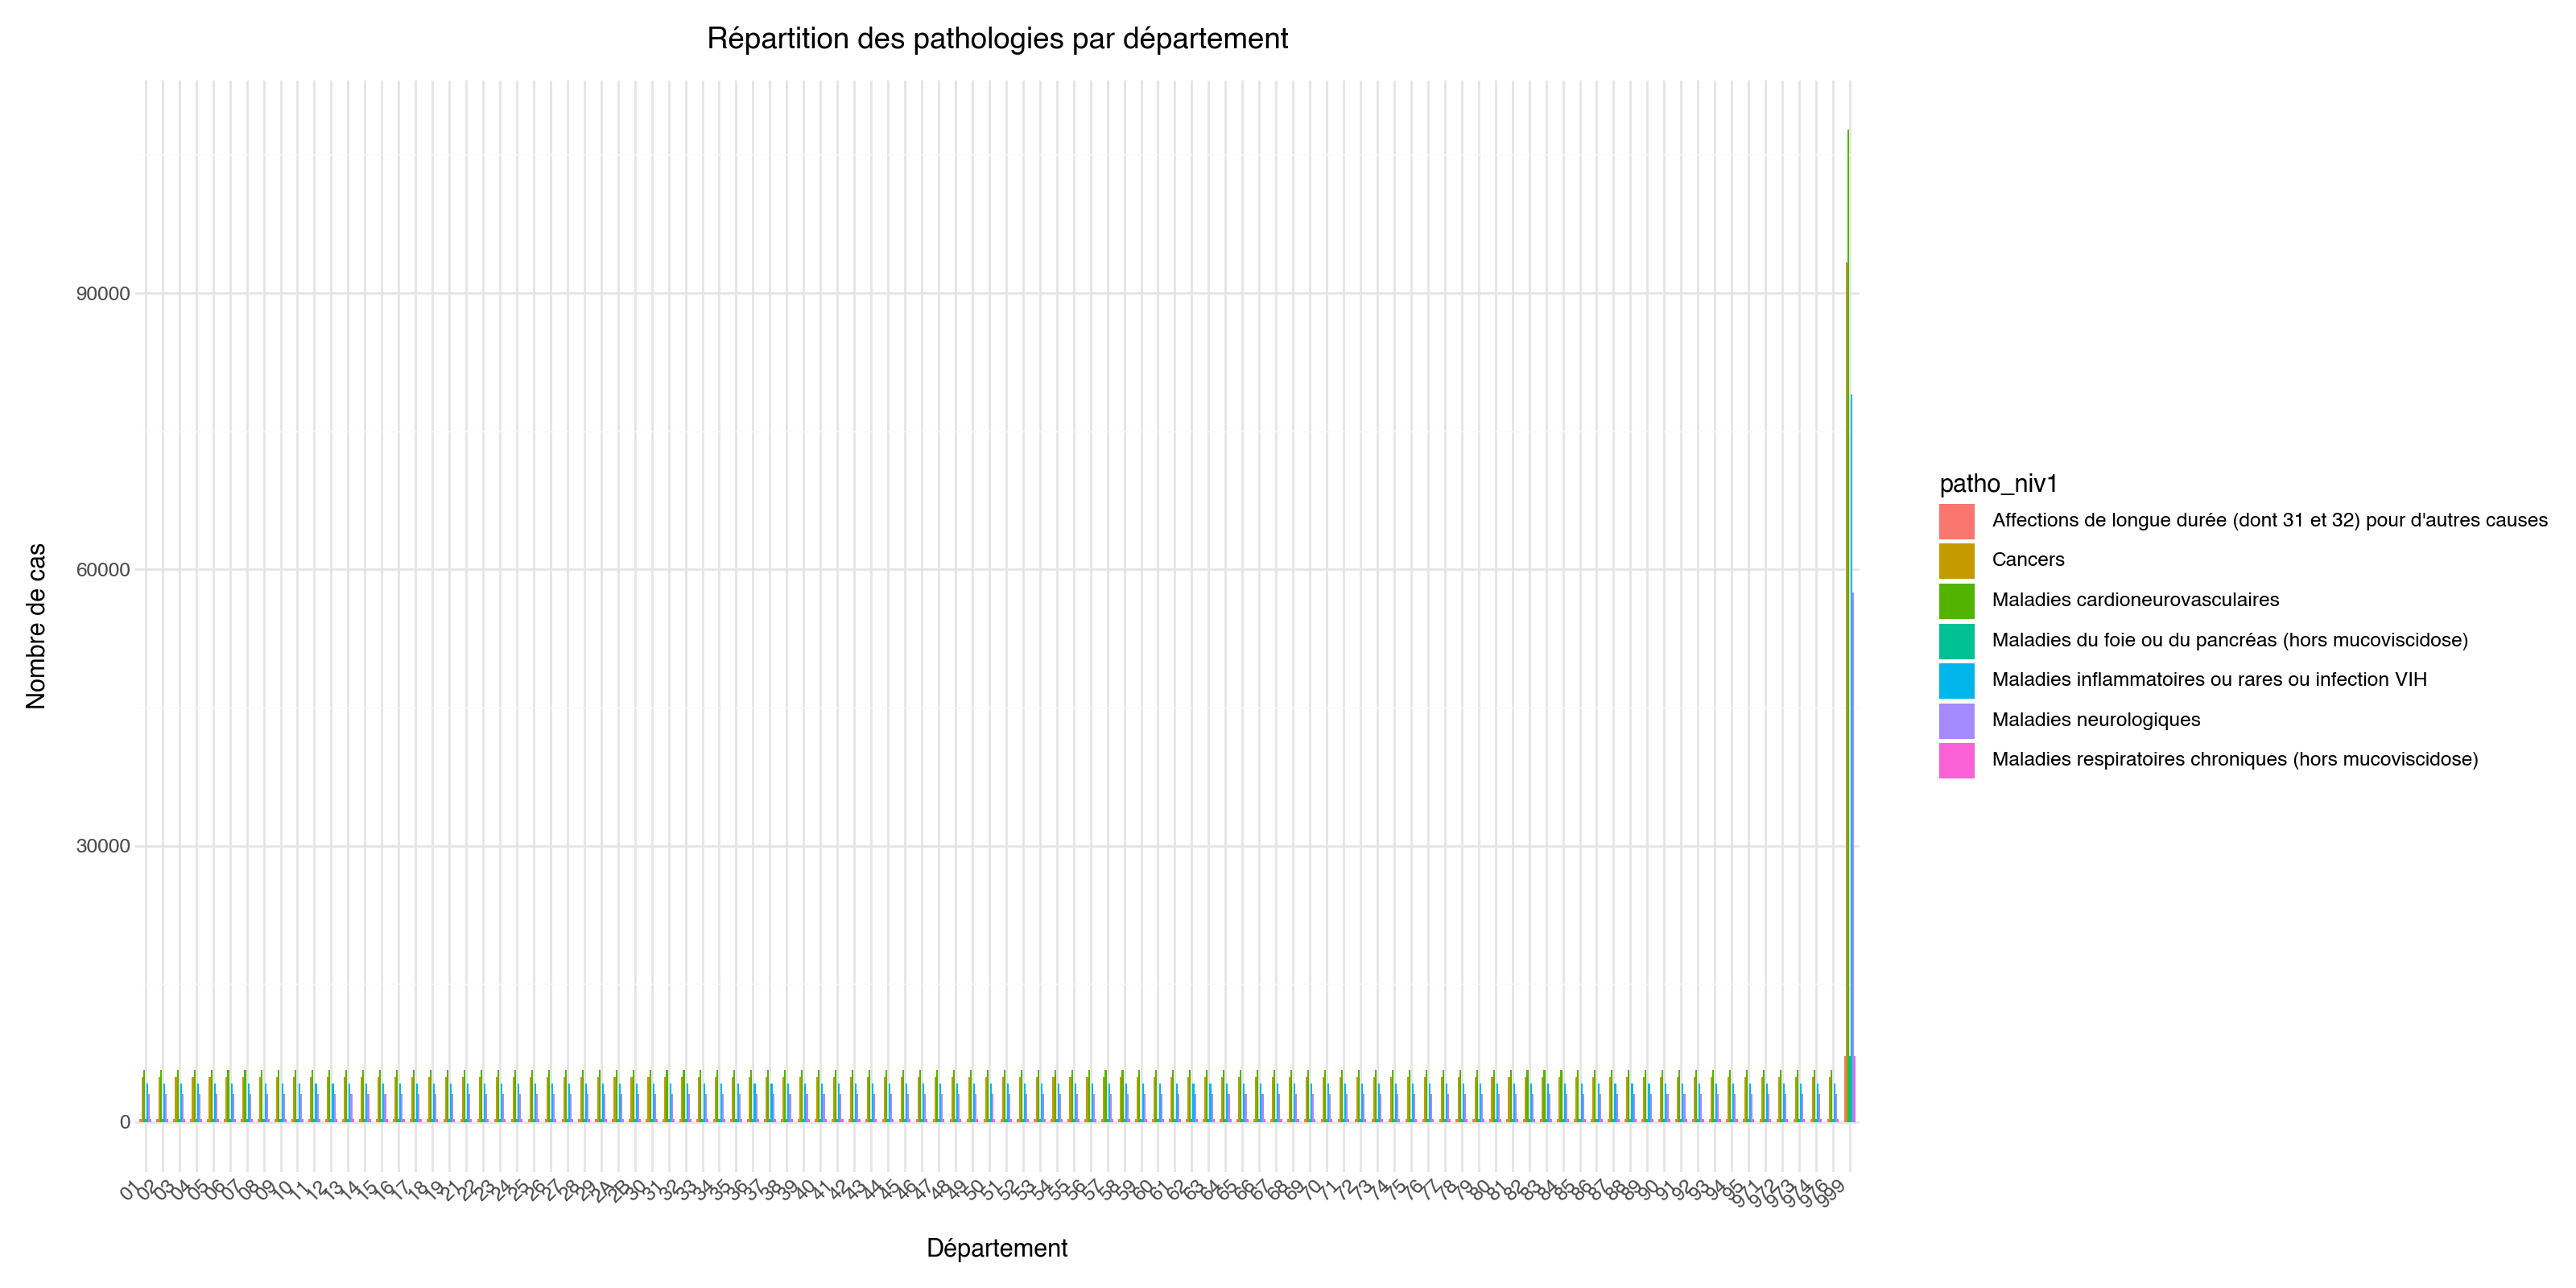

In [122]:
pd.crosstab(Patho_filtre['dept'],Patho_filtre['patho_niv1'])

(
     ggplot(Patho_filtre, aes(x='dept', fill='patho_niv1')) +
     geom_bar(position='dodge', width=0.7) +
     labs(
          title='Répartition des pathologies par département',
          x='Département', 
          y='Nombre de cas') +
    theme_minimal()+
    theme(
        figure_size=(16, 8),  # largeur x hauteur
        axis_text_x=element_text(rotation=45, ha='right') # pivote les labels de l'axe X
    )
) 

Outlier au département 999, creuser le pourquoi ? 

In [179]:
# Nombre de lignes avec dept manquant
Patho_filtre['dept'].isna().sum()

# Filtrer le département 999
Patho_filtre[Patho_filtre['dept'] == '999']['Npop'].sum()
Patho_filtre[Patho_filtre['dept'] == '41']['Npop'].sum()
Patho_filtre[Patho_filtre['dept'] == '972']['Npop'].sum()





np.int64(161978500)

OUTLIER AU 999 
visiblement + de 118672163000 cas dans le 999 vs  292034500 dans le 41 un departement normal 
donc on supprime le 999 

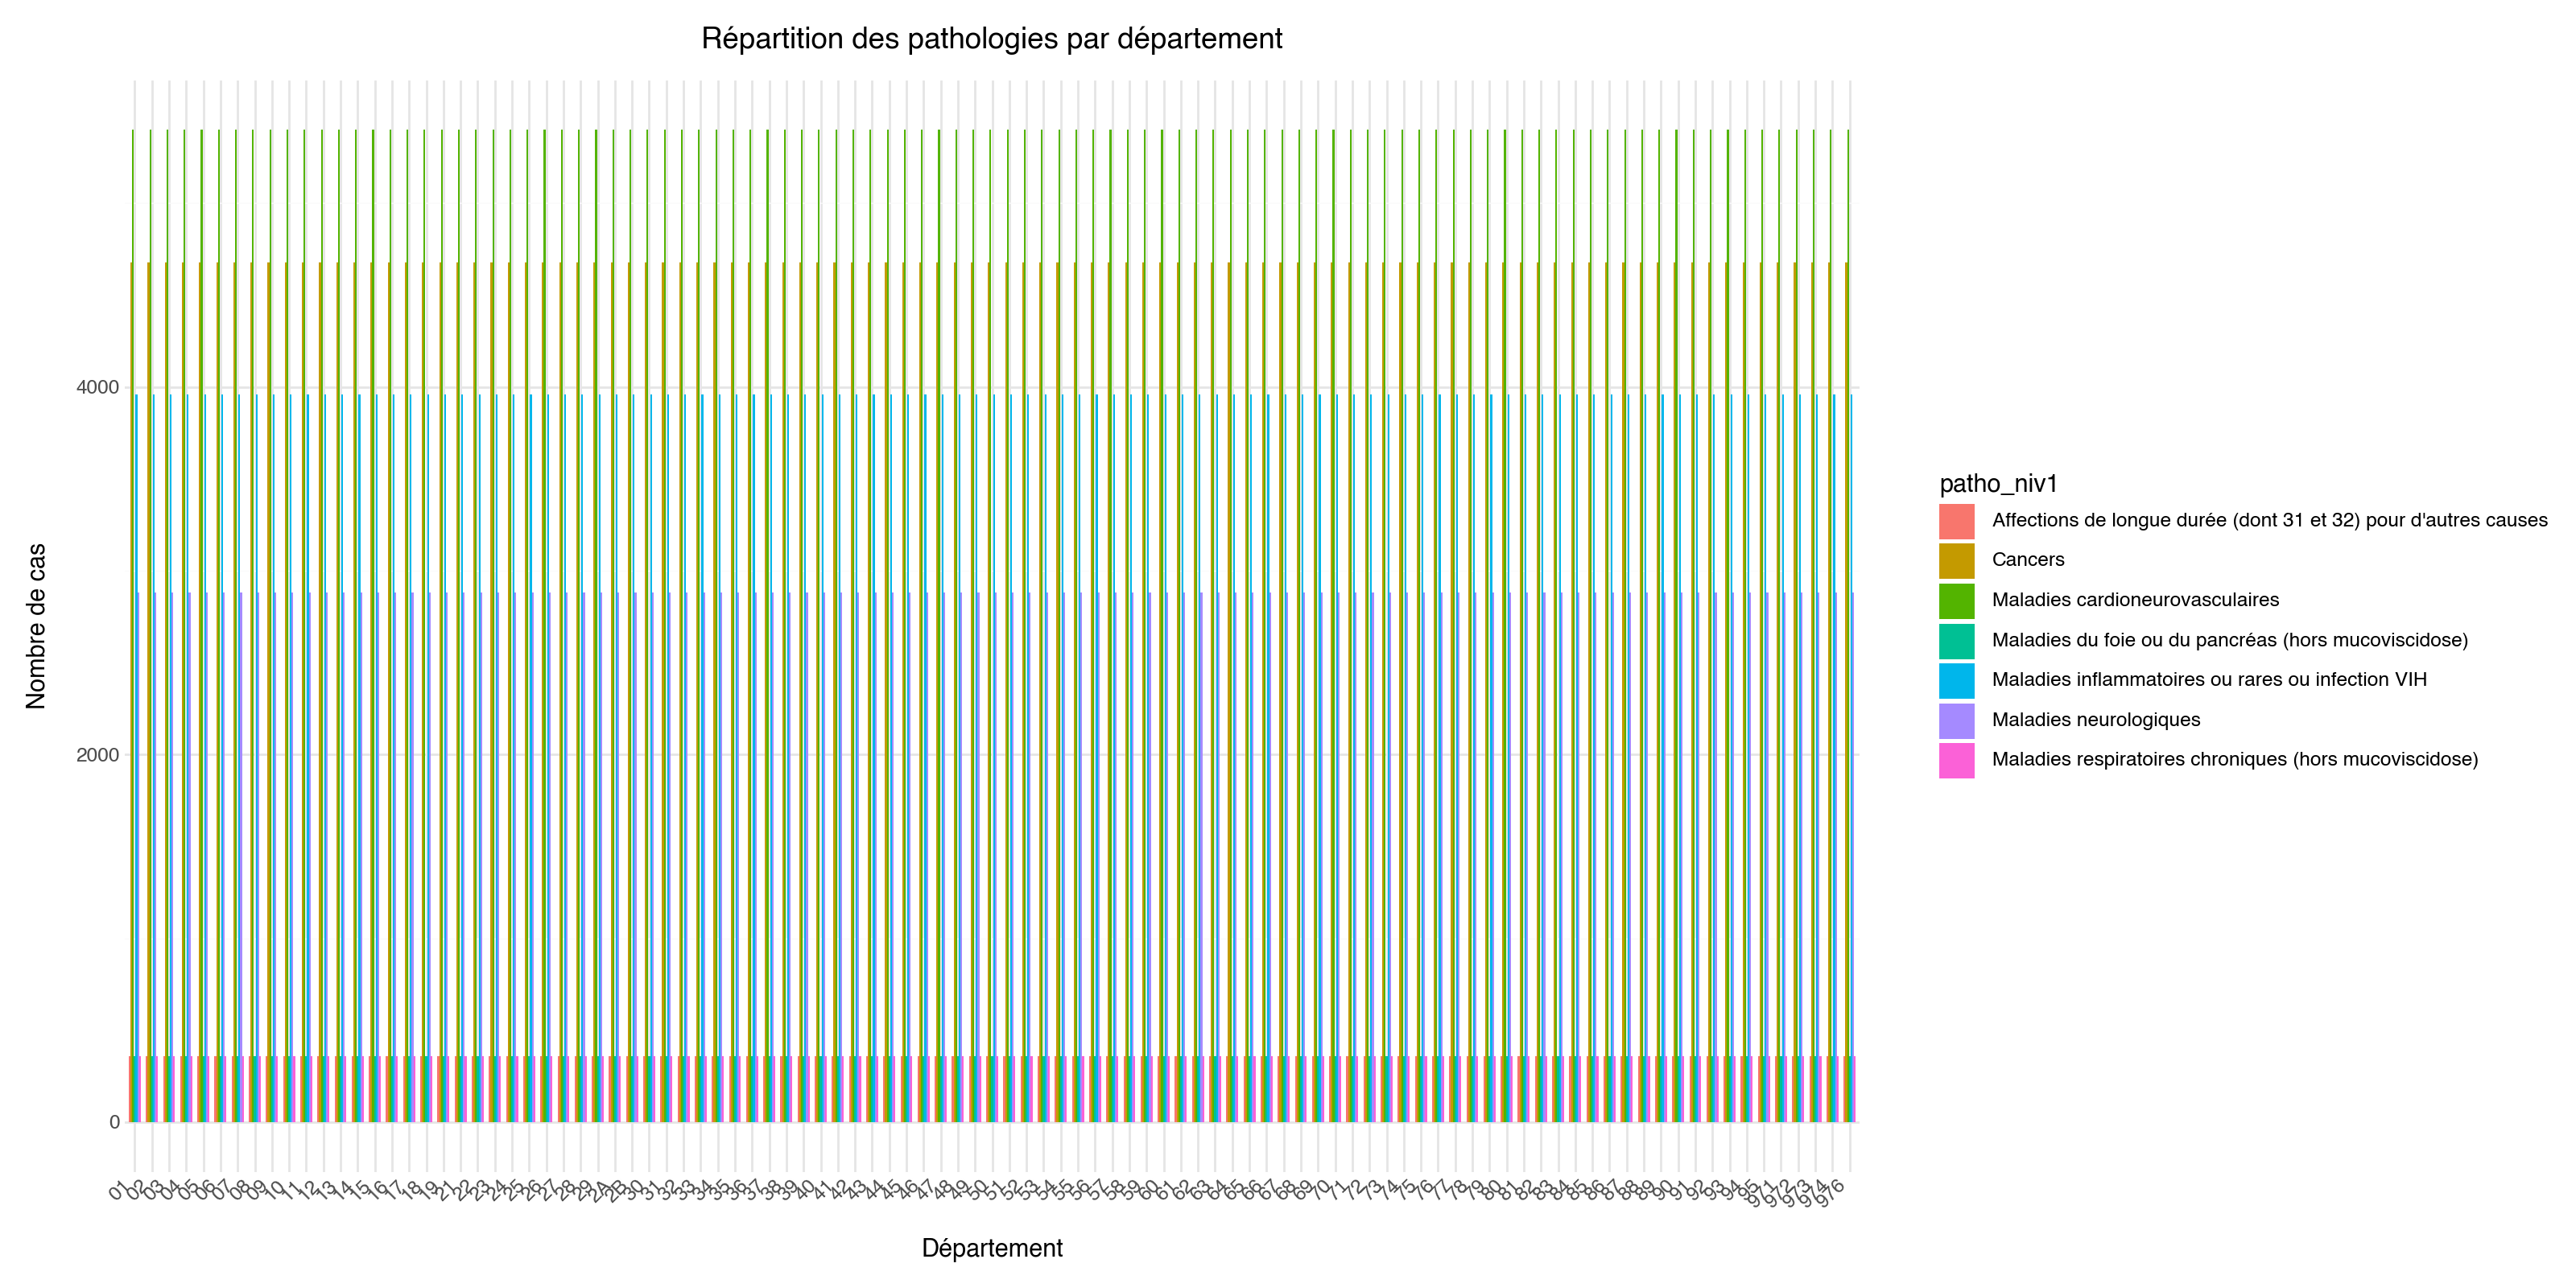

In [230]:
# Exclure le département 999
Patho_filtre_clean = Patho_filtre[Patho_filtre['dept'] != '999']

# Vérifier le crosstab si besoin
pd.crosstab(Patho_filtre_clean['dept'], Patho_filtre_clean['patho_niv1'])

# Refaire le graphique sans le 999
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text

(
    ggplot(Patho_filtre_clean, aes(x='dept', fill='patho_niv1')) +
    geom_bar(position='dodge', width=0.7) +
    labs(
        title='Répartition des pathologies par département',
        x='Département', 
        y='Nombre de cas'
    ) +
    theme_minimal() +
    theme(
        figure_size=(16, 8),                      # plus large pour espacer les barres
        axis_text_x=element_text(rotation=45, ha='right')  # pivote et aligne les labels
    )
)


Bien, mais pas le plot le plus optimal 

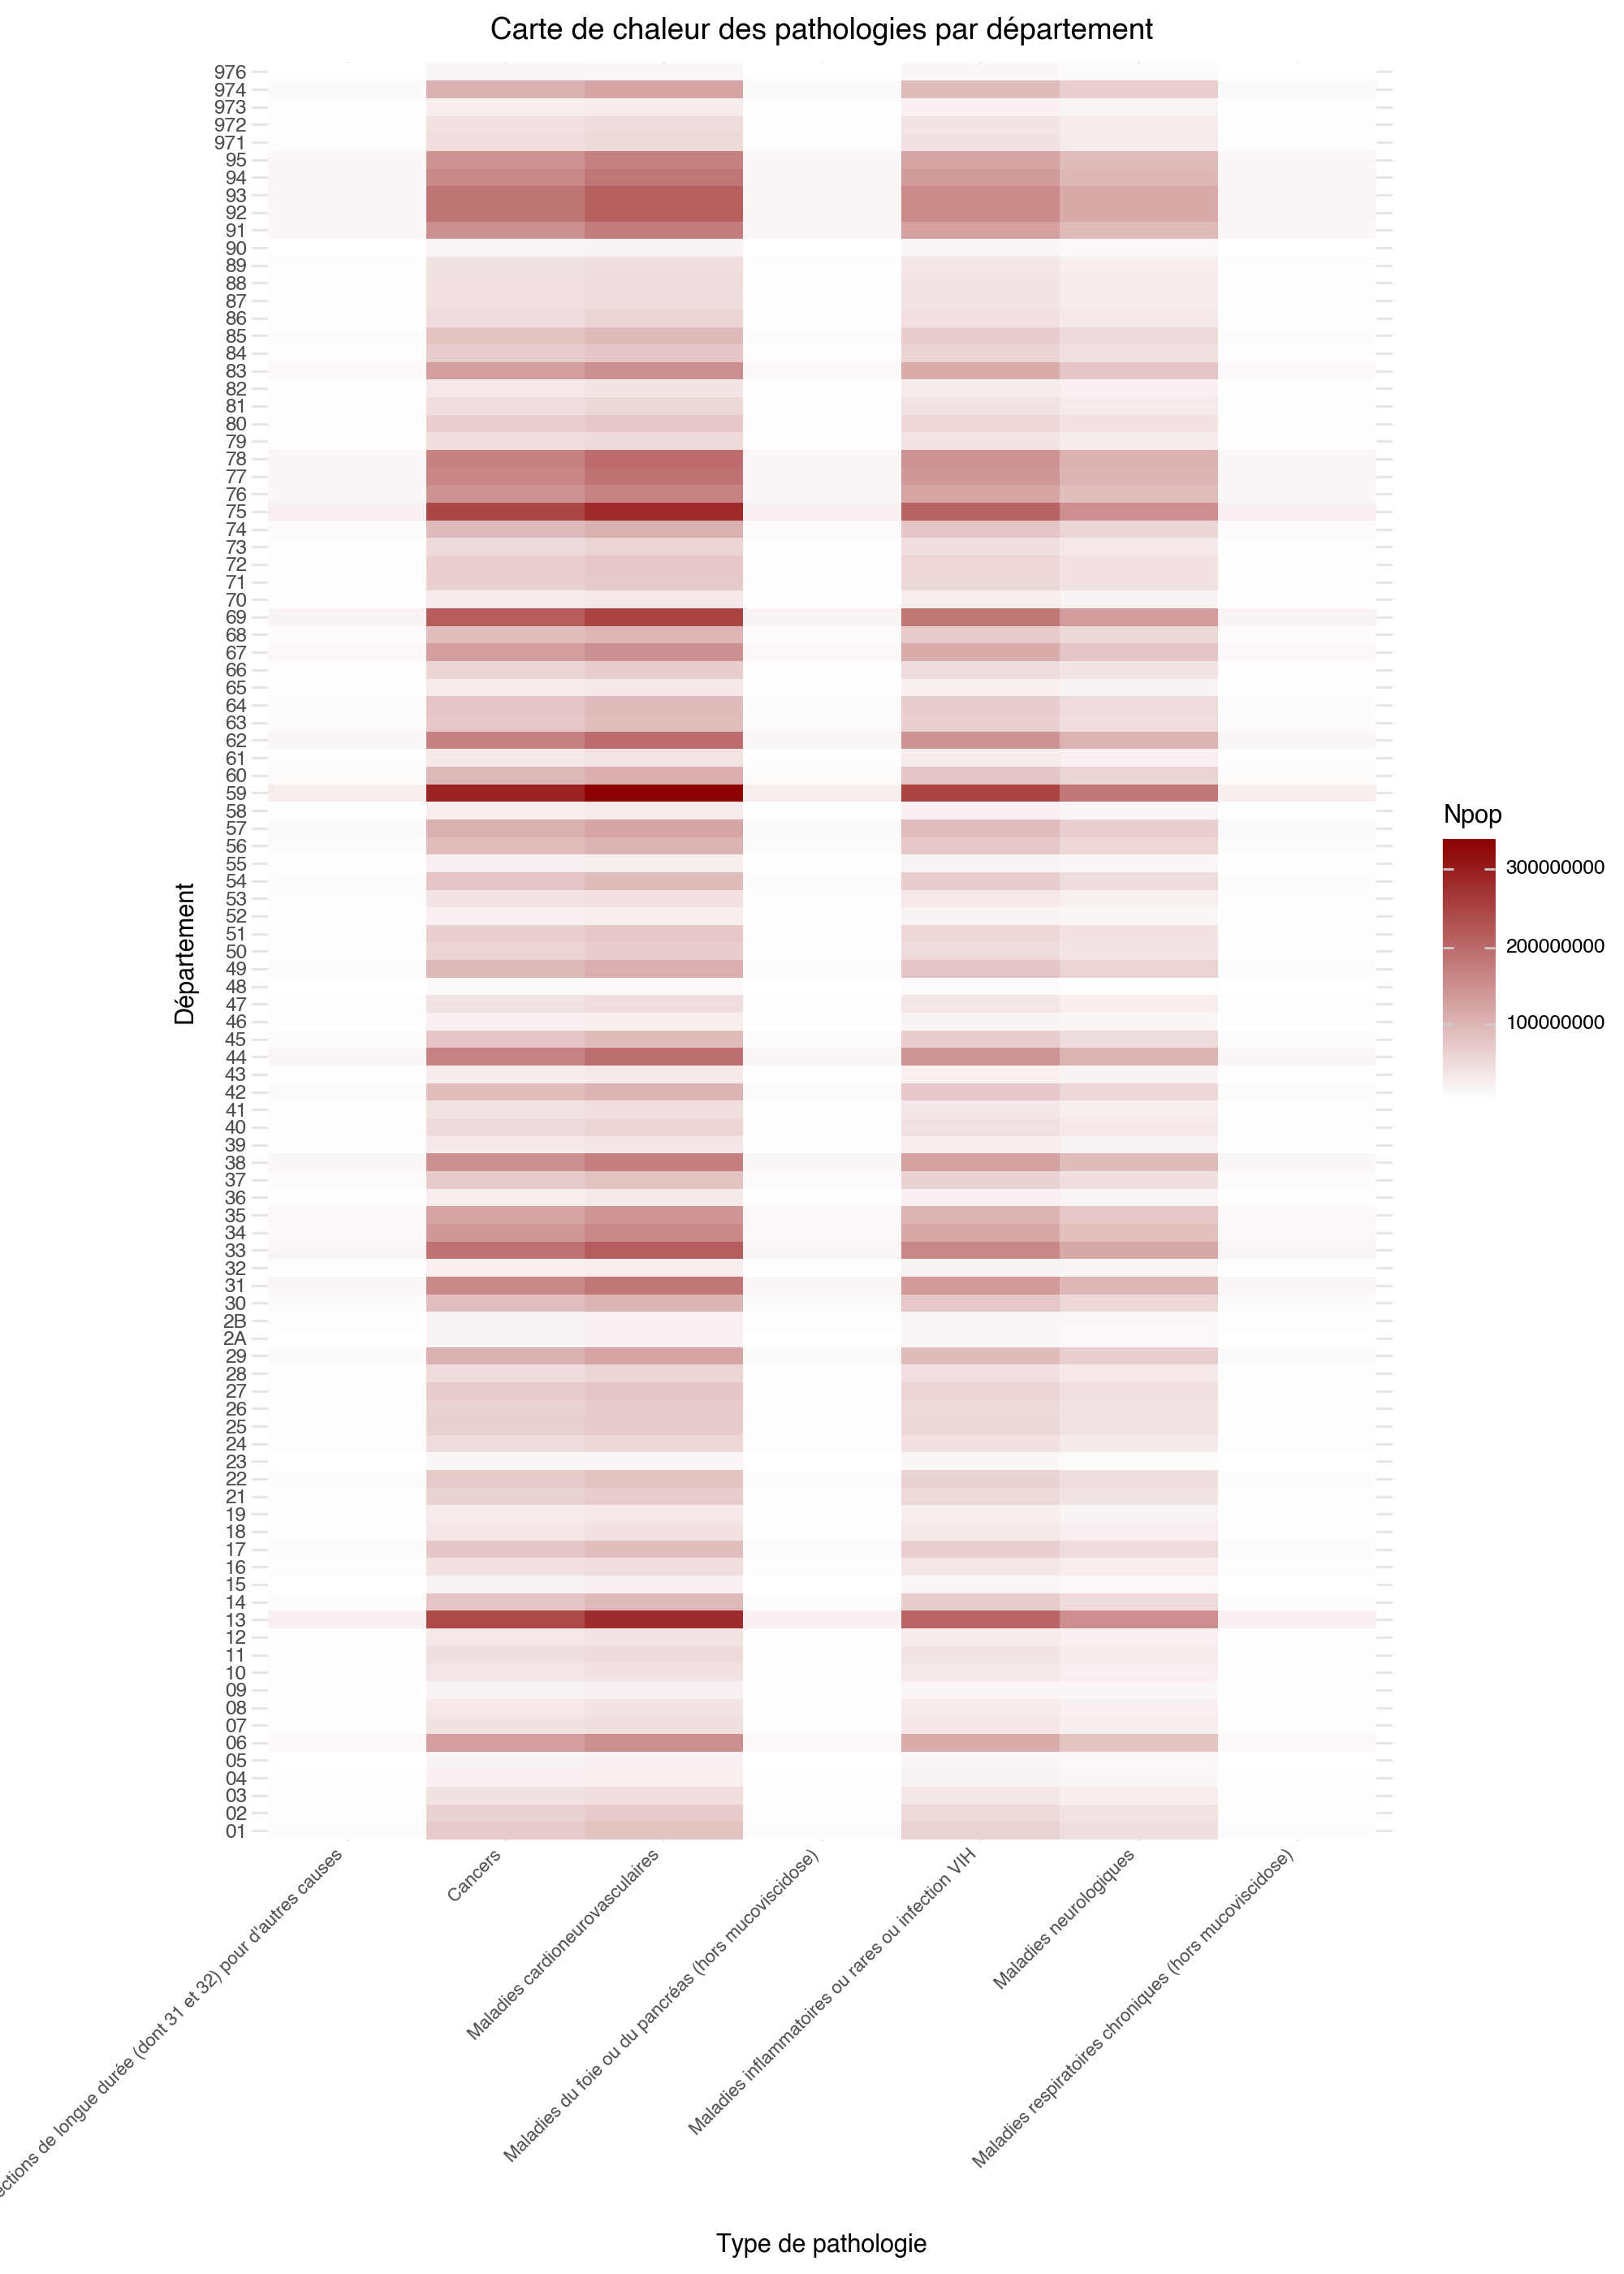

In [ ]:
pivot_df = Patho_filtre.pivot_table(
    values='Npop',
    index='dept',
    columns='patho_niv1',
    aggfunc='sum'
).reset_index().melt(id_vars='dept', var_name='patho_niv1', value_name='Npop')

(
    ggplot(pivot_df, aes(x='patho_niv1', y='dept', fill='Npop')) +
    geom_tile() +
    scale_fill_gradient(low='white', high='darkred') +
    labs(title='Carte de chaleur des pathologies par département',
         x='Type de pathologie', y='Département') +
    theme_minimal() +
    theme(
        figure_size=(10, 14),
        axis_text_x=element_text(rotation=45, ha='right', size=8)
    )
)


Tentative de carte 

In [120]:
departements = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
merged = departements.merge(Mal_dep, left_on='code', right_on='dept',how='left')

pathos = [
    "Affections de longue durée (dont 31 et 32) pour d'autres causes",
    'Cancers',
    'Maladies cardioneurovasculaires',
    'Maladies du foie ou du pancréas (hors mucoviscidose)',
    'Maladies inflammatoires ou rares ou infection VIH',
    'Maladies neurologiques',
    'Maladies respiratoires chroniques (hors mucoviscidose)'
]

colors = {patho: plt.cm.tab10(i) for i, patho in enumerate(pathos)}


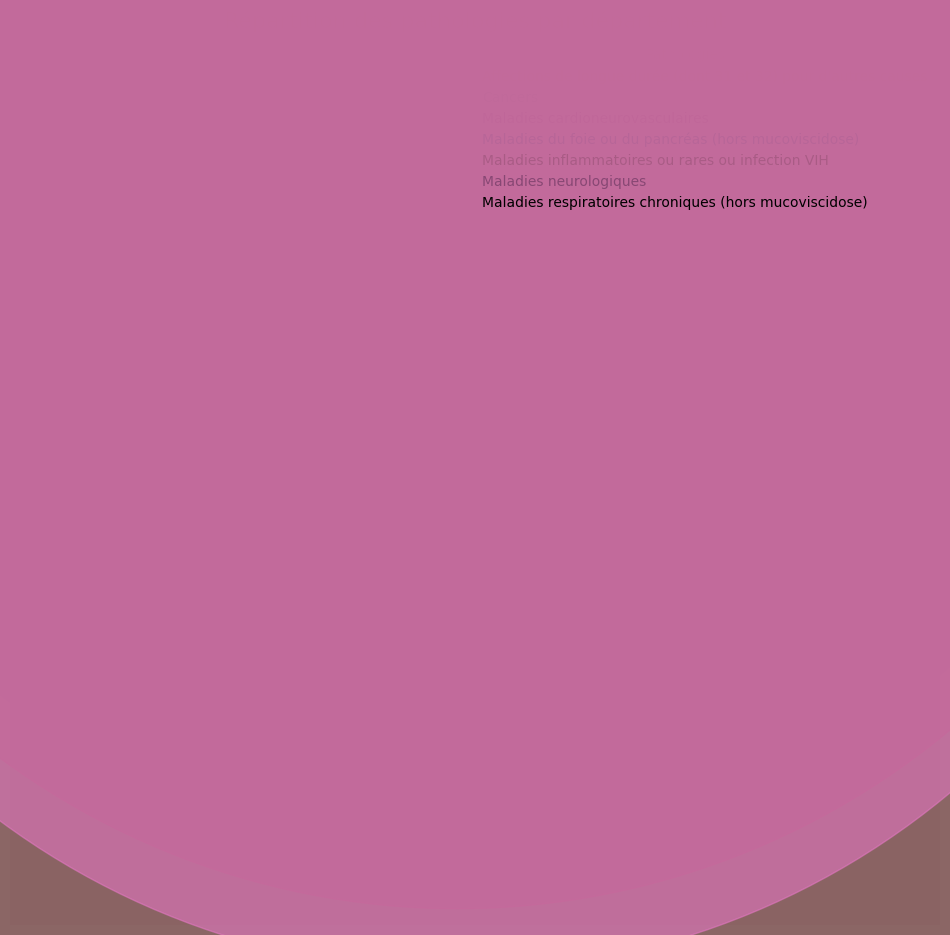

In [133]:
fig, ax = plt.subplots(figsize=(12,12))
departements.plot(ax=ax, color='lightgrey', edgecolor='white')

# Ajouter les cercles proportionnels
for patho in pathos:
    df = merged[merged['patho_niv1'] == patho]
    for idx, row in df.iterrows():
        if pd.notna(row['Npop']):
            x, y = row.geometry.centroid.x, row.geometry.centroid.y
            ax.scatter(
                x, y,
                s=row['Npop']*0.5,   # ajuster la taille selon tes données
                color=colors[patho],
                alpha=0.6,
                label=patho
            )

# Supprimer les doublons dans la légende
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Pathologies", loc='upper right')

ax.set_title("Répartition des pathologies par département", fontsize=16)
ax.axis('off')  # cacher les axes

plt.show()

Obervation Âge / Maladie 

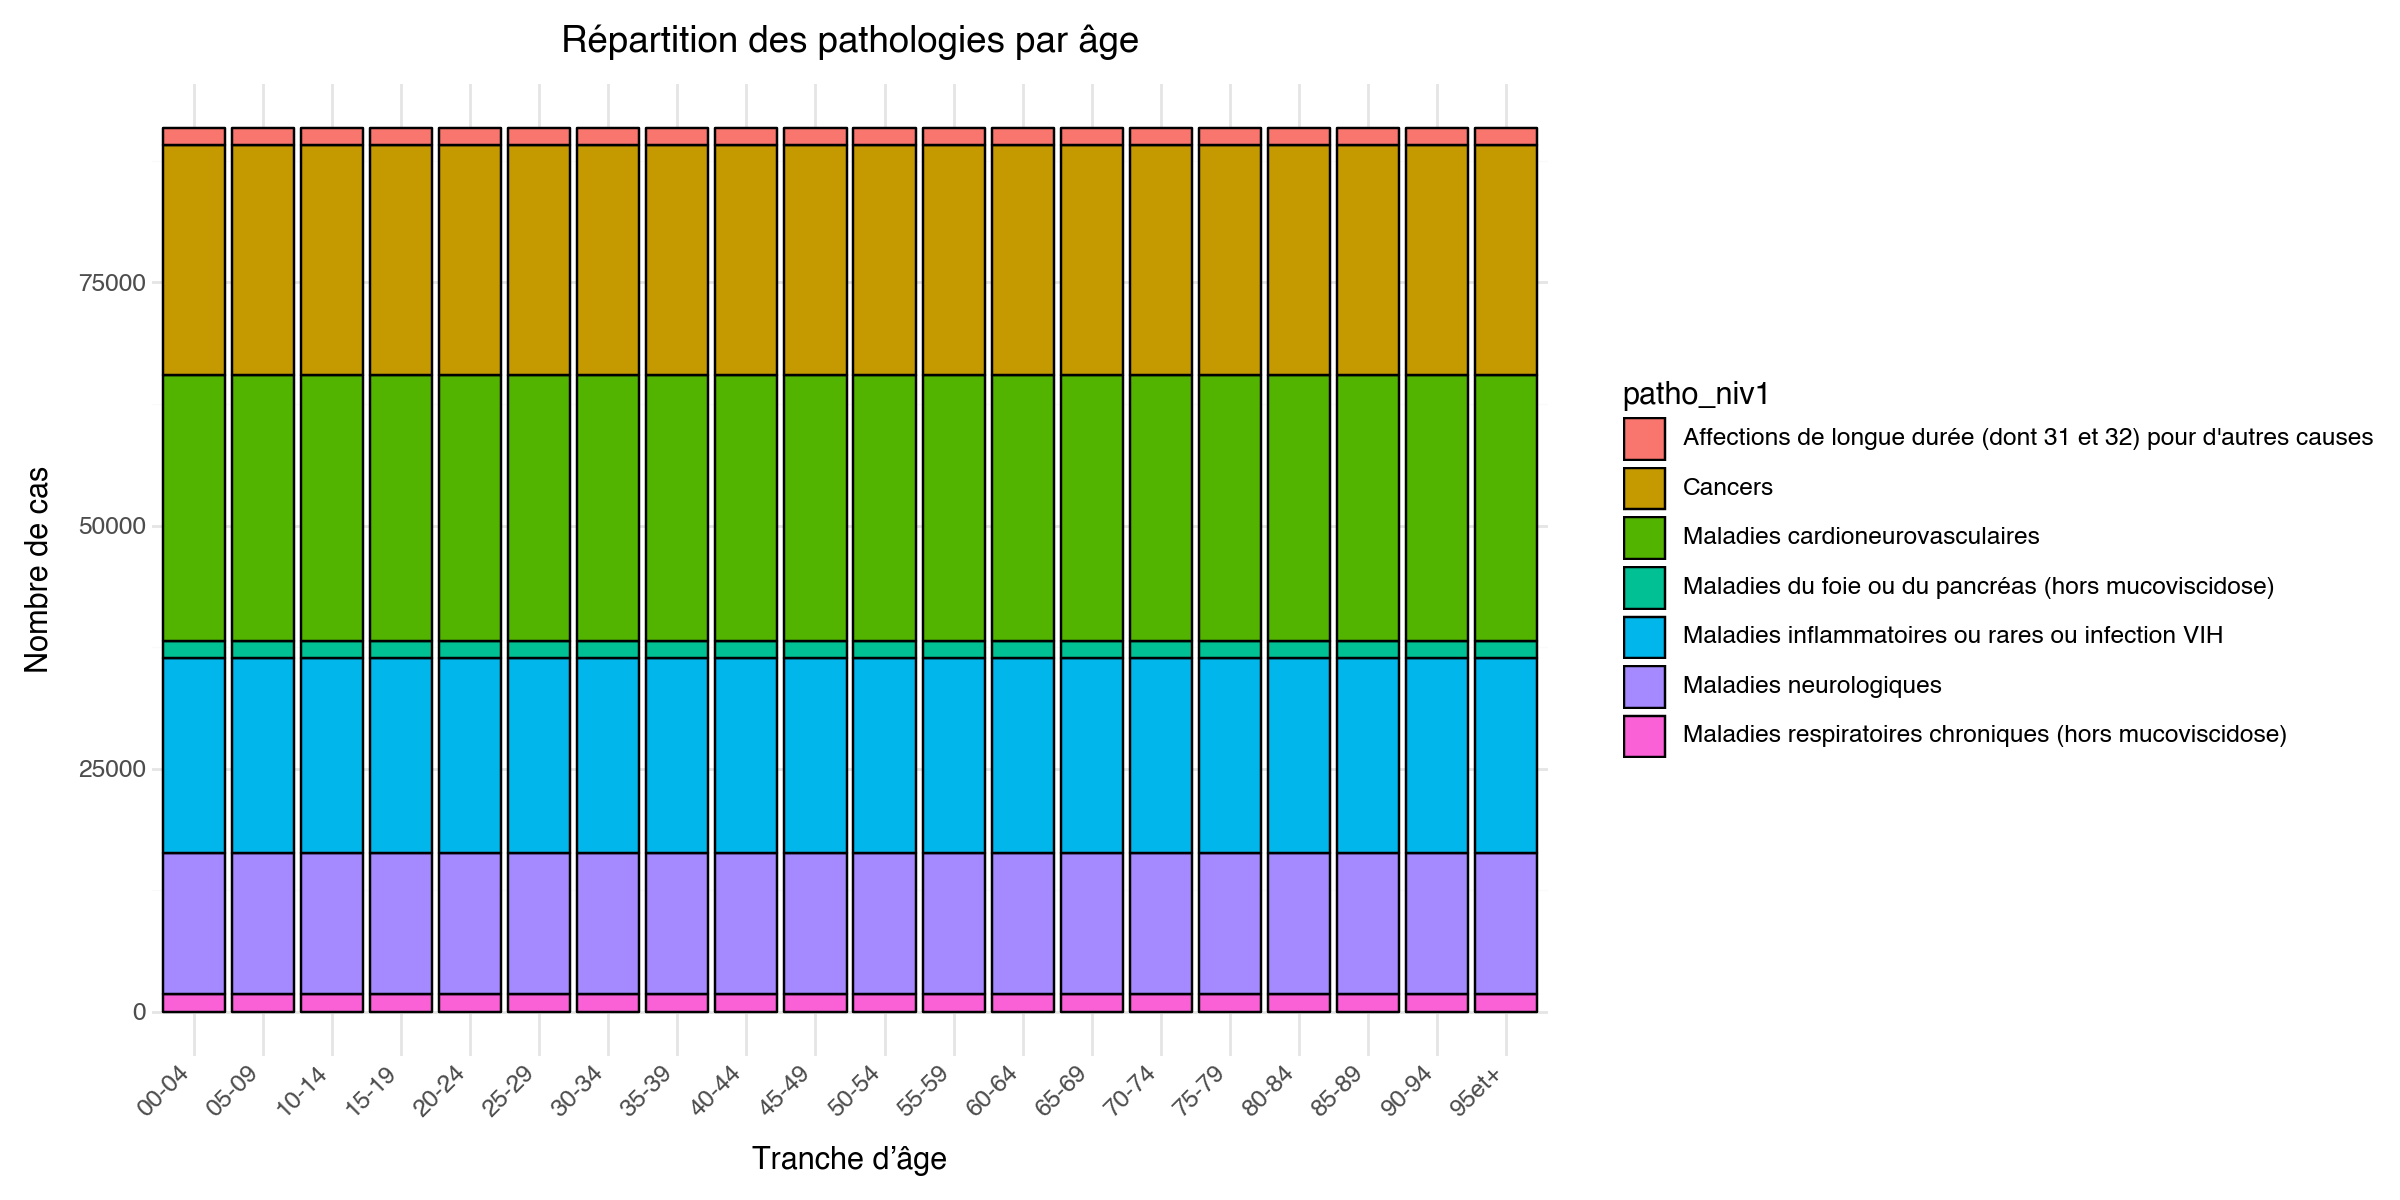

In [238]:
(
    ggplot(Patho_filtre_clean, aes(x='cla_age_5', fill='patho_niv1')) +
    geom_bar(position='stack', color='black') +
    labs(
        title='Répartition des pathologies par âge',
        x='Tranche d’âge',
        y='Nombre de cas'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        axis_text_x=element_text(rotation=45, ha='right')
    )
)



In [144]:
# Supprimer les lignes avec des âges invalides
Patho_filtre = Patho_filtre[Patho_filtre['cla_age_5'] != 'tsage']

# Vérifier qu'il reste bien les tranches d'âge normales
Patho_filtre['cla_age_5'].unique()


array(['75-79', '80-84', '85-89', '90-94', '95et+', '00-04', '05-09',
       '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74'], dtype=object)

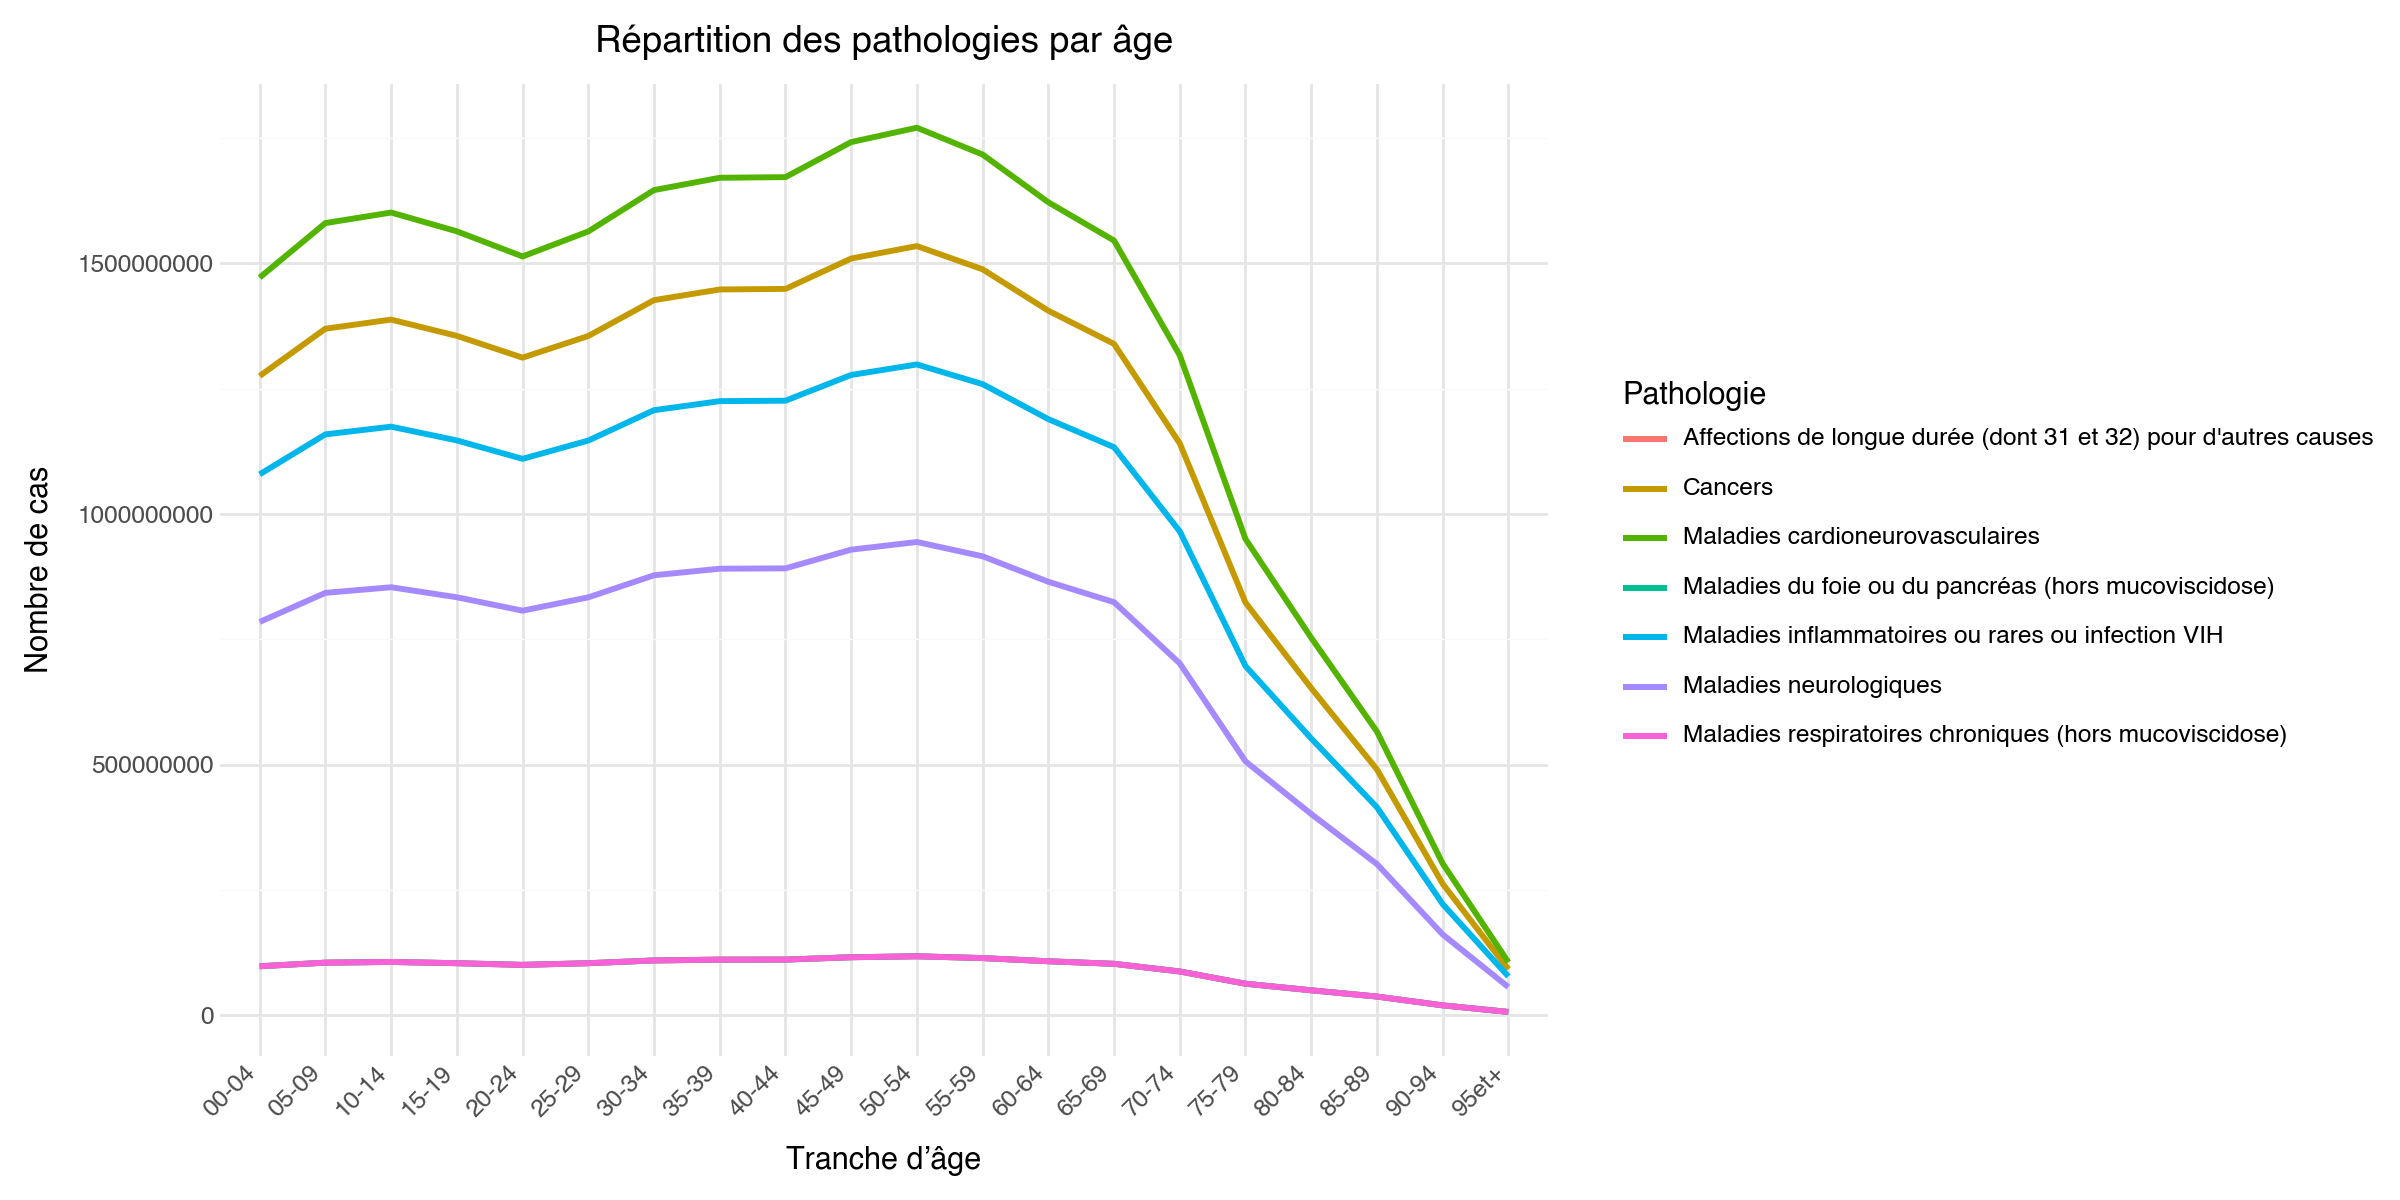

In [149]:
age_patho = Patho_filtre.groupby(['cla_age_5', 'patho_niv1'])['Npop'].sum().reset_index()


(
    ggplot(age_patho, aes(x='cla_age_5', y='Npop', color='patho_niv1', group='patho_niv1')) +
    geom_line(size=1.2) +  # courbes un peu plus épaisses
    labs(
        title='Répartition des pathologies par âge',
        x='Tranche d’âge',
        y='Nombre de cas',
        color='Pathologie'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        axis_text_x=element_text(rotation=45, ha='right')
    )
)


remarque je n'ai ni maladie du fois, pancrea ni affection 

In [ ]:
Patho_filtre_clean['patho_niv1'].unique()
Patho_filtre_clean.groupby('patho_niv1')['Npop'].sum().sort_values(ascending=False)



patho_niv1
Maladies cardioneurovasculaires                                    8872810800
Cancers                                                            7689769360
Maladies inflammatoires ou rares ou infection VIH                  6506727920
Maladies neurologiques                                             4732165760
Affections de longue durée (dont 31 et 32) pour d'autres causes     591520720
Maladies du foie ou du pancréas (hors mucoviscidose)                591520720
Maladies respiratoires chroniques (hors mucoviscidose)              591520720
Name: Npop, dtype: int64

Problème sur ces maladies:
Affections de longue durée (dont 31 et 32) pour d'autres causes     591520720
Maladies du foie ou du pancréas (hors mucoviscidose)                591520720
Maladies respiratoires chroniques (hors mucoviscidose)              591520720
Meme données surement même chose 

In [158]:
Patho_filtre


,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
0,2023,Maladies cardioneurovasculaires,75-79,1,1,999,7290
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
2,2023,Maladies cardioneurovasculaires,75-79,1,3,999,1590
3,2023,Maladies cardioneurovasculaires,75-79,1,4,999,10010
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [219]:
maladie_sexe = (
    Patho_filtre_clean
    .groupby(['patho_niv1','sexe'])['Npop']
    .sum()
    .reset_index()
)

print(maladie_sexe)

                                           patho_niv1  sexe        Npop
0   Affections de longue durée (dont 31 et 32) pou...     1   283465580
1   Affections de longue durée (dont 31 et 32) pou...     2   308055140
2                                             Cancers     1  3685052540
3                                             Cancers     2  4004716820
4                     Maladies cardioneurovasculaires     1  4251983700
5                     Maladies cardioneurovasculaires     2  4620827100
6   Maladies du foie ou du pancréas (hors mucovisc...     1   283465580
7   Maladies du foie ou du pancréas (hors mucovisc...     2   308055140
8   Maladies inflammatoires ou rares ou infection VIH     1  3118121380
9   Maladies inflammatoires ou rares ou infection VIH     2  3388606540
10                             Maladies neurologiques     1  2267724640
11                             Maladies neurologiques     2  2464441120
12  Maladies respiratoires chroniques (hors mucovi...     1   28

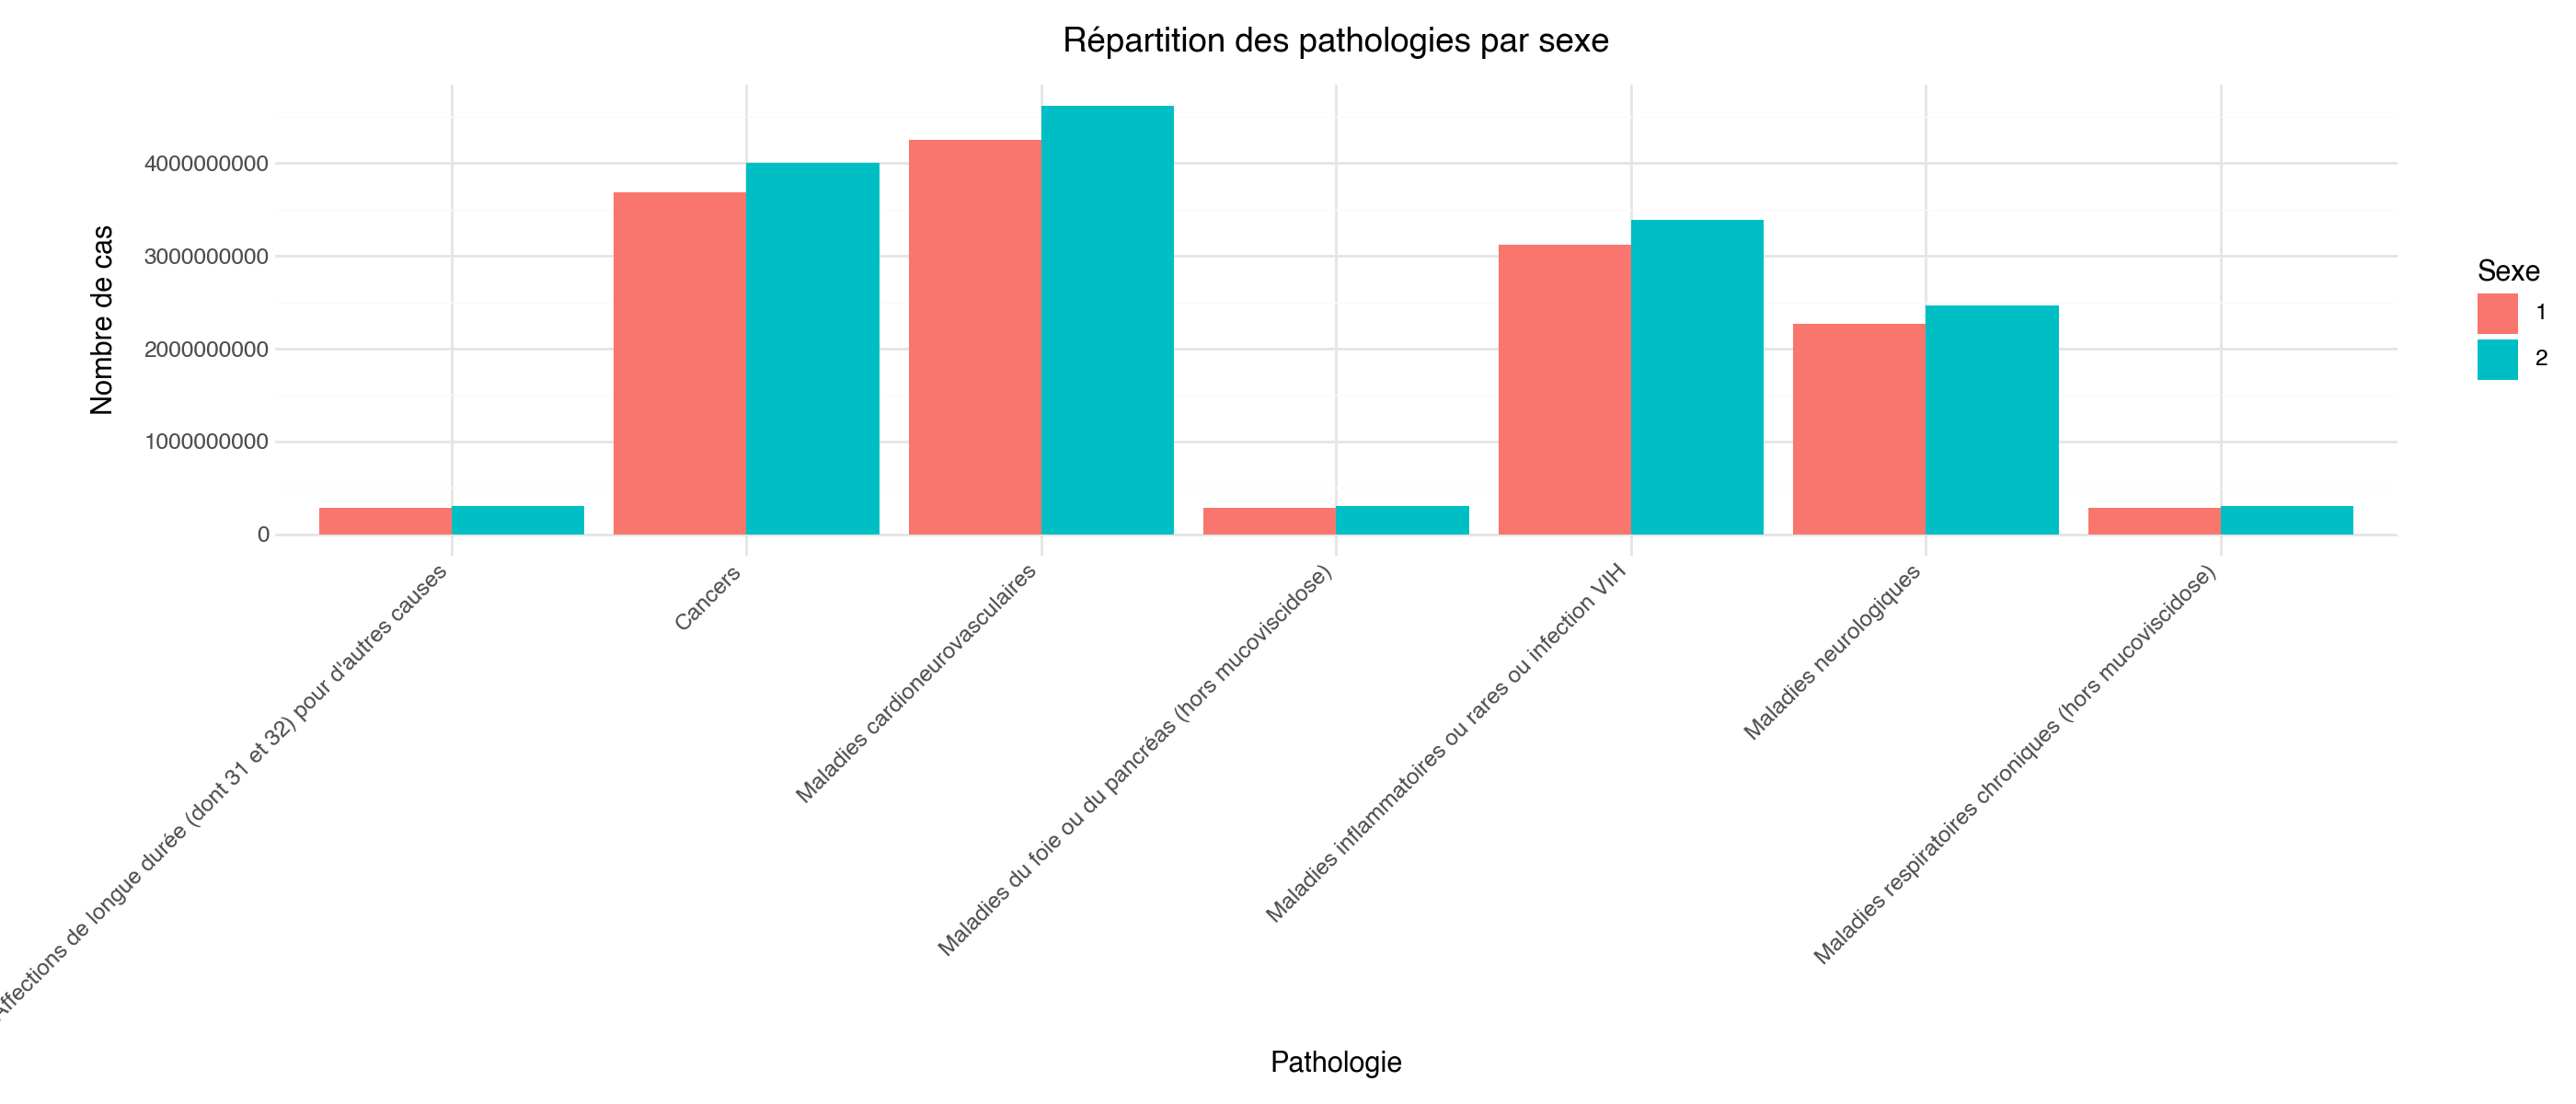

In [253]:

(
    ggplot(maladie_sexe, aes(x='patho_niv1', y='Npop', fill='factor(sexe)')) +
    geom_bar(stat='identity', position='dodge') +  # barres côte à côte
    labs(
        title='Répartition des pathologies par sexe',
        x='Pathologie',
        y='Nombre de cas',
        fill='Sexe'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14,6),
        axis_text_x=element_text(rotation=45, ha='right')
    )
)

OK pour la catégorie sexe 


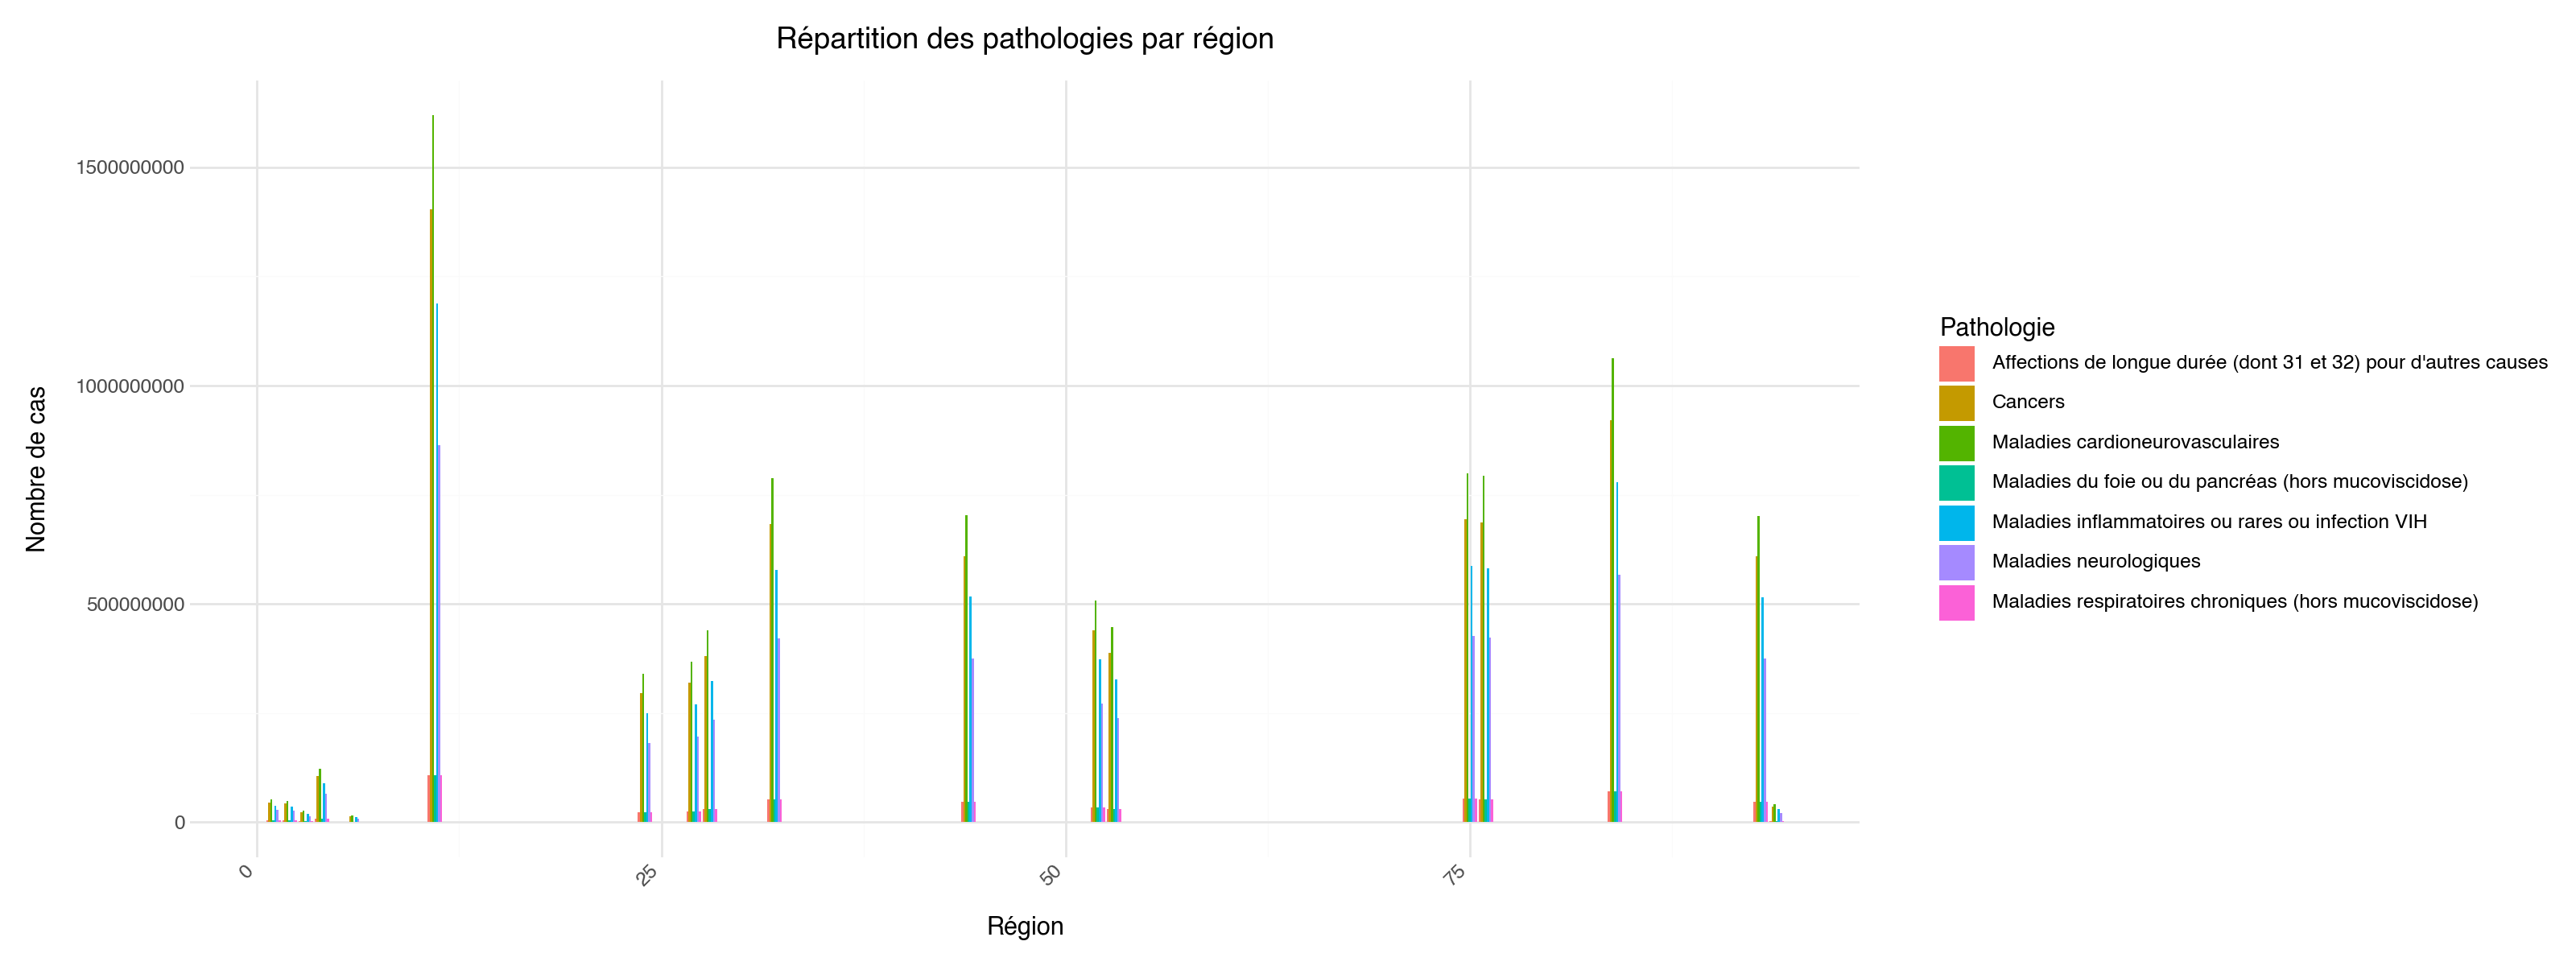

In [247]:
region_patho = Patho_filtre_clean.groupby(['region', 'patho_niv1'])['Npop'].sum().reset_index()

(
    ggplot(region_patho, aes(x='region', y='Npop', fill='patho_niv1')) +
    geom_bar(stat='identity', position='dodge') +  # côte à côte
    labs(
        title='Répartition des pathologies par région',
        x='Région',
        y='Nombre de cas',
        fill='Pathologie'
    ) +
    theme_minimal() +
    theme(
        figure_size=(16, 6),
        axis_text_x=element_text(rotation=45, ha='right')
    )
)

Lorsque je regarde les régions et les départements problème notamment: dept 999 associé a la région 1 et par suite à la region 4 

In [248]:
Patho_filtre['dept'].unique()

array(['972', '976', '75', '91', '94', '28', '37', '45', '27', '76', '02',
       '60', '80', '52', '54', '57', '67', '68', '49', '85', '16', '86',
       '87', '30', '32', '46', '81', '09', '01', '15', '03', '42', '63',
       '04', '05', '06', '77', '92', '95', '18', '58', '61', '62', '08',
       '88', '72', '22', '35', '56', '33', '47', '64', '11', '31', '34',
       '48', '65', '38', '07', '13', '971', '973', '78', '25', '50', '51',
       '44', '53', '17', '23', '40', '82', '26', '69', '73', '74', '39',
       '70', '71', '90', '59', '19', '79', '974', '93', '55', '29', '66',
       '43', '2A', '41', '84', '89', '12', '2B', '36', '10', '83', '21',
       '14', '24'], dtype=object)

In [249]:
Patho_filtre['region'].unique()

array([ 2,  6, 11, 24, 28, 32, 44, 52, 75, 76, 84, 93, 27, 53,  1,  3,  4,
       94])

In [181]:
# Pour chaque région, lister les départements uniques
region_depts = Patho_filtre.groupby('region')['dept'].unique().reset_index()
region_depts


,region,dept
0,1,"[999, 971]"
1,2,"[972, 999]"
2,3,"[999, 973]"
3,4,"[999, 974]"
4,6,"[976, 999]"
5,11,"[75, 91, 94, 999, 77, 92, 95, 78, 93]"
6,24,"[28, 37, 45, 18, 999, 41, 36]"
7,27,"[58, 25, 39, 70, 71, 90, 999, 89, 21]"
8,28,"[27, 76, 61, 50, 999, 14]"
9,32,"[02, 60, 80, 999, 62, 59]"


In [182]:
# Nombre de régions uniques par département
dept_region_count = Patho_filtre.groupby('dept')['region'].nunique().reset_index(name='n_regions')

# Départements avec plus d'une région
multi_region_depts = dept_region_count[dept_region_count['n_regions'] > 1]
multi_region_depts


,dept,n_regions
101,999,19


In [185]:
Patho_filtre_clean = Patho_filtre[Patho_filtre['dept'] != '999']


j'ai supprimé que 999 mais on peut aussi supprimer tout les DOM TOM pour eviter des erreurs 

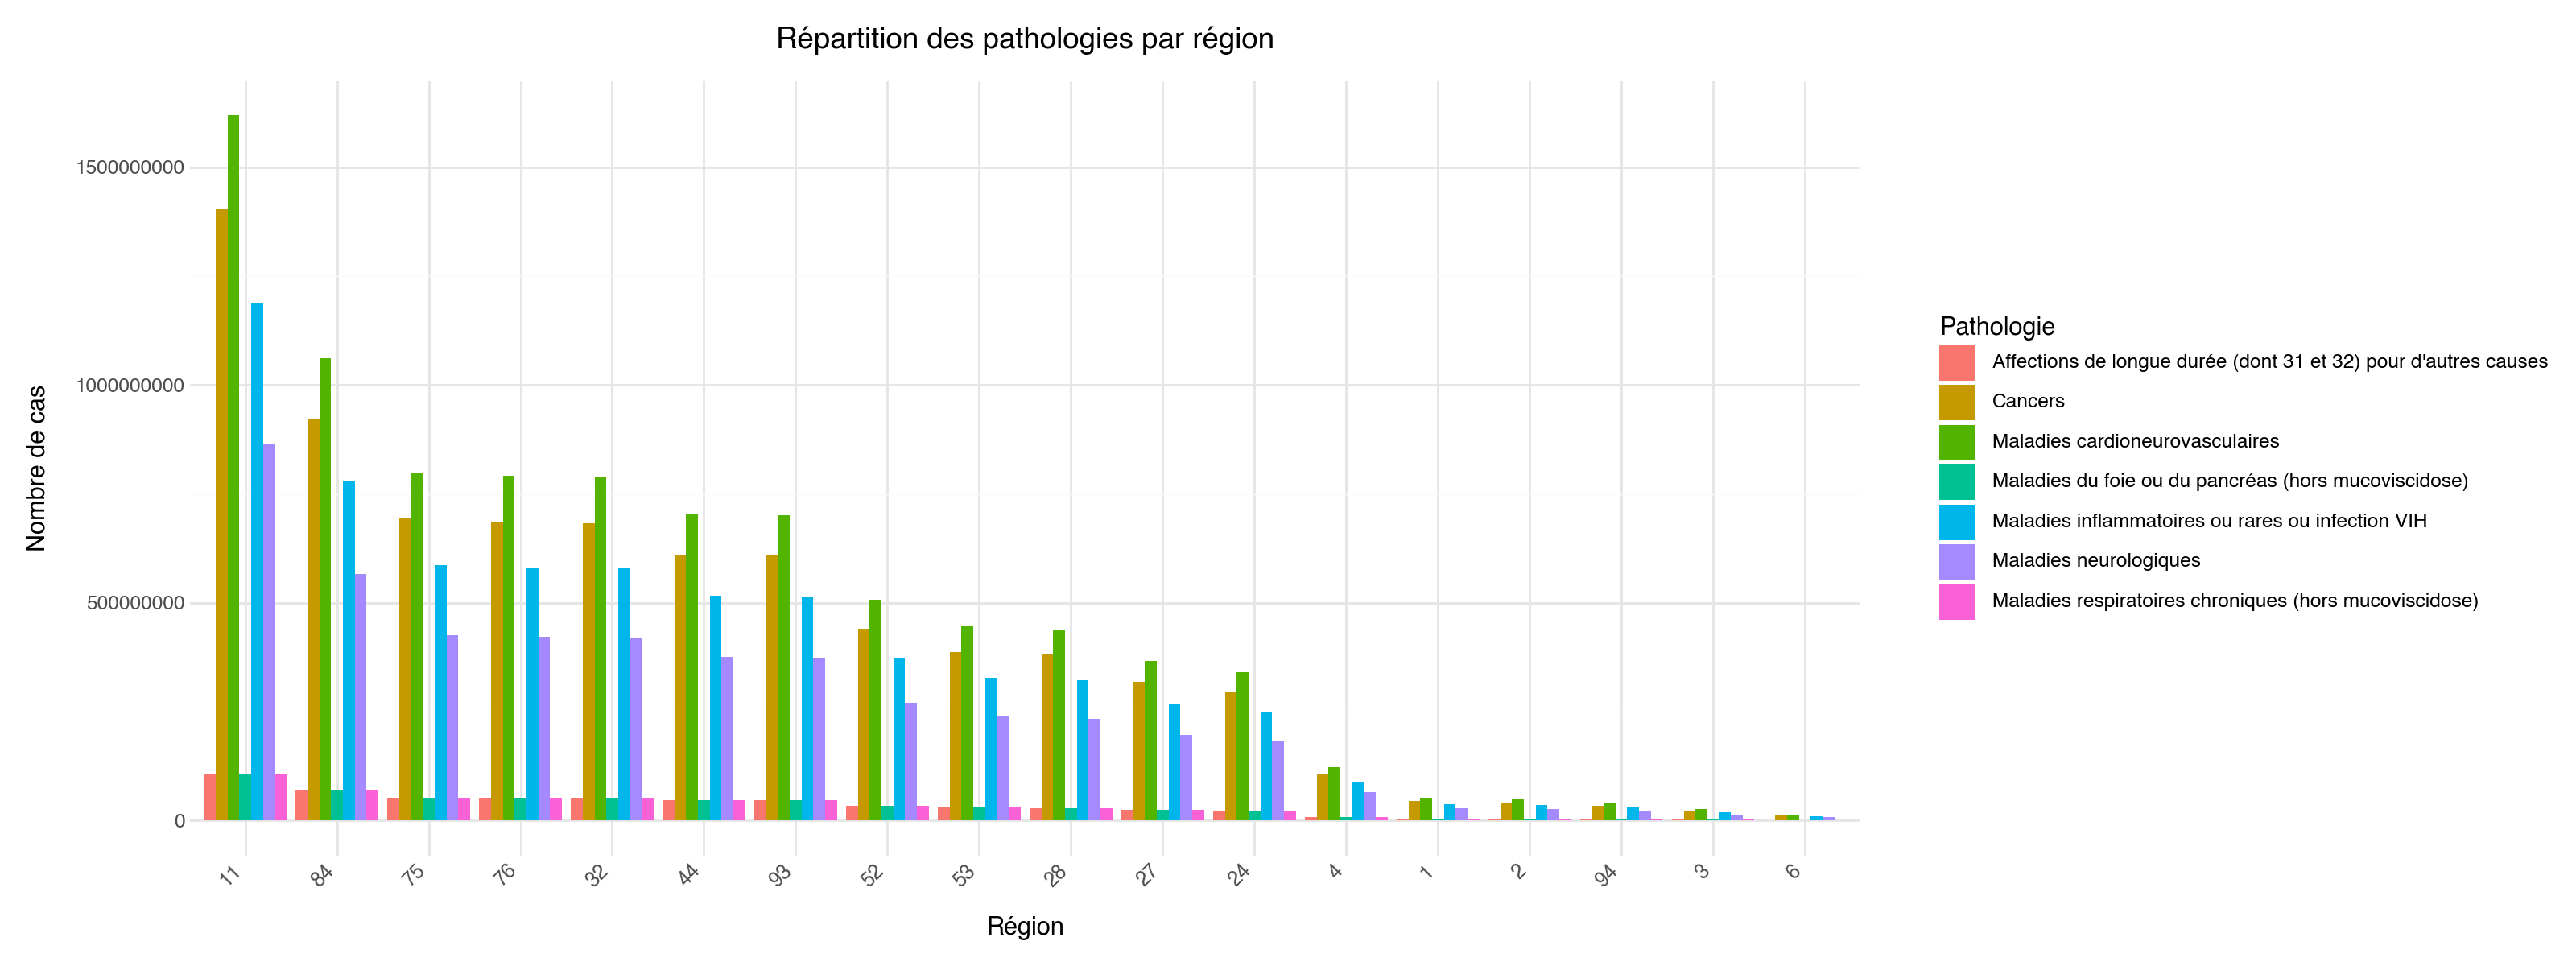

In [250]:
dept_region_count = Patho_filtre_clean.groupby('dept')['region'].nunique().reset_index(name='n_regions')
multi_region_depts = dept_region_count[dept_region_count['n_regions'] > 1]

# 3️⃣ Agréger Npop par région et pathologie
region_patho = (
    Patho_filtre_clean
    .groupby(['region', 'patho_niv1'])['Npop']
    .sum()
    .reset_index()
)

# 4️⃣ Définir un ordre pour les régions (par nombre total de cas)
region_order = region_patho.groupby('region')['Npop'].sum().sort_values(ascending=False).index
region_patho['region'] = pd.Categorical(region_patho['region'], categories=region_order, ordered=True)

# 5️⃣ Plot barres côte à côte
(
    ggplot(region_patho, aes(x='region', y='Npop', fill='patho_niv1')) +
    geom_bar(stat='identity', position='dodge') +
    labs(
        title='Répartition des pathologies par région',
        x='Région',
        y='Nombre de cas',
        fill='Pathologie'
    ) +
    theme_minimal() +
    theme(
        figure_size=(16,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)

la où le moins de cas Corse (4) / et DOM TOM. 
ca serait bien de reussir à faire une map avec repartition des maladies 

In [190]:
year_patho = (
    Patho_filtre_clean
    .groupby(['annee', 'patho_niv1'])['Npop']
    .sum()
    .reset_index()
)


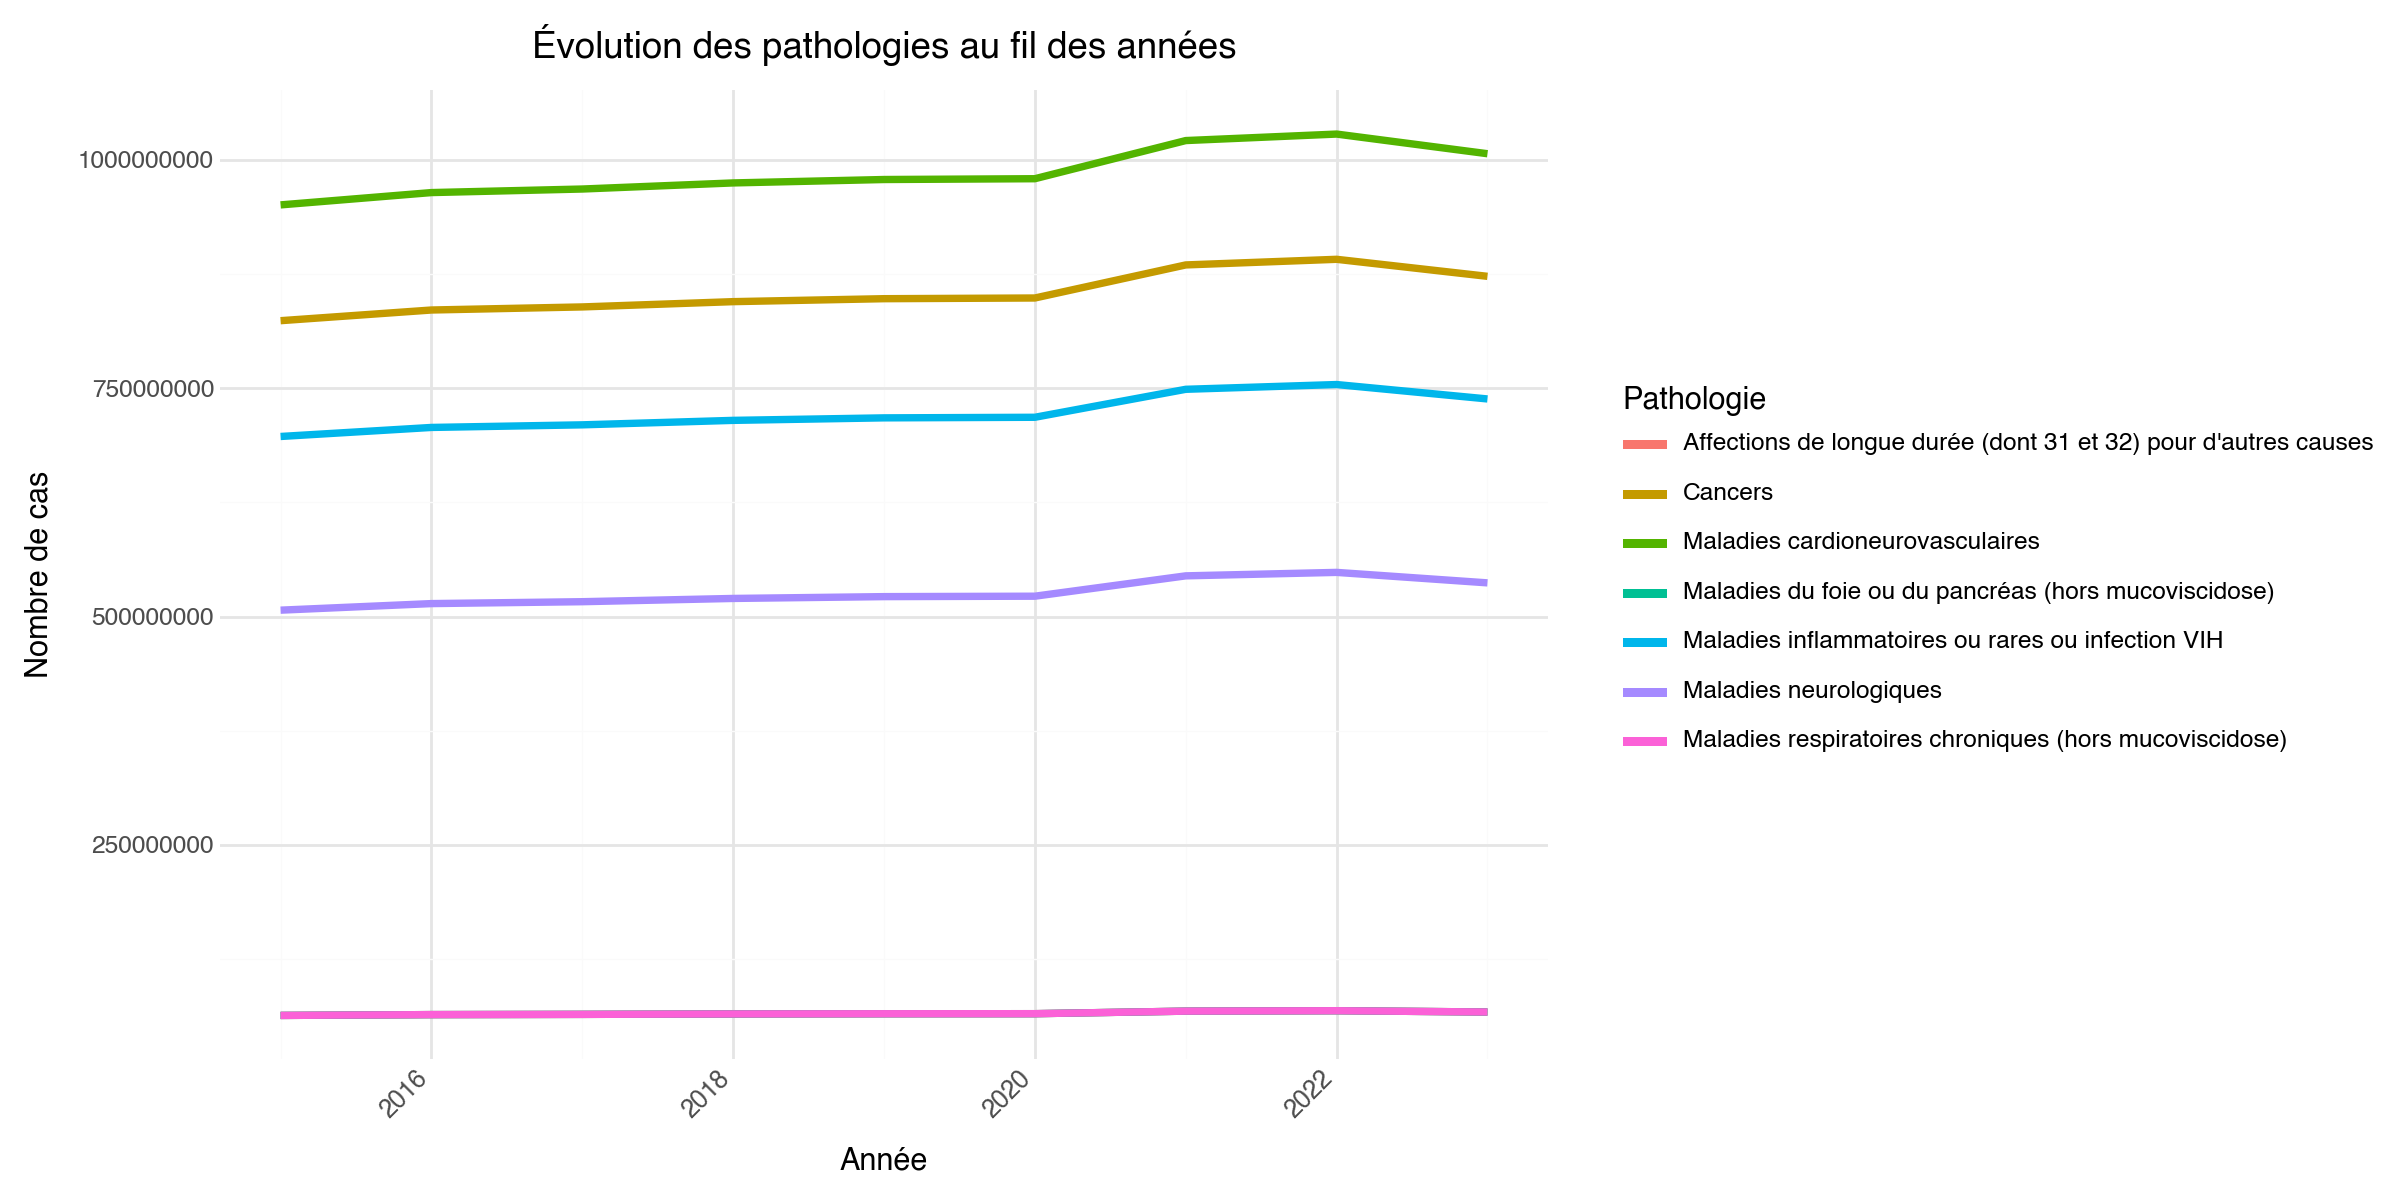

In [191]:
(
    ggplot(year_patho, aes(x='annee', y='Npop', color='patho_niv1', group='patho_niv1')) +
    geom_line(size=1.5) +
    labs(
        title='Évolution des pathologies au fil des années',
        x='Année',
        y='Nombre de cas',
        color='Pathologie'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)

In [193]:
year_patho['patho_niv1'].unique()
# Filtrer la pathologie et sommer Npop
affection_cases = Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == "Affections de longue durée (dont 31 et 32) pour d'autres causes"]['Npop'].sum()

print(affection_cases)


591520720


In [194]:
# Par année
Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == "Affections de longue durée (dont 31 et 32) pour d'autres causes"].groupby('annee')['Npop'].sum()


annee
2015    63388350
2016    64287620
2017    64546860
2018    64991840
2019    65240930
2020    65299260
2021    68084040
2022    68558140
2023    67123680
Name: Npop, dtype: int64

In [195]:
# Par département
Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == "Affections de longue durée (dont 31 et 32) pour d'autres causes"].groupby('dept')['Npop'].sum()


dept
01     5473410
02     4639240
03     2945460
04     1462440
05     1253690
        ...   
971    3449280
972    3239570
973    1752630
974    8128940
976     971130
Name: Npop, Length: 101, dtype: int64

In [196]:
# Vérifier les valeurs extrêmes
Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == "Affections de longue durée (dont 31 et 32) pour d'autres causes"]['Npop'].describe()


count     36360.000000
mean      16268.446645
std       15247.050025
min          10.000000
25%        5540.000000
50%       11215.000000
75%       21090.000000
max      116130.000000
Name: Npop, dtype: float64

bizarre maladie respiratoire à 0 pas de courbe d'affection ni de maladie du fois et les courbes este assez linéaire 

In [197]:
exclude_depts = ['999','971','972','973','974','976']
Patho_filtre_metropole = Patho_filtre_clean[~Patho_filtre_clean['dept'].isin(exclude_depts)]

year_patho = (
    Patho_filtre_metropole
    .groupby(['annee','patho_niv1'])['Npop']
    .sum()
    .reset_index()
)


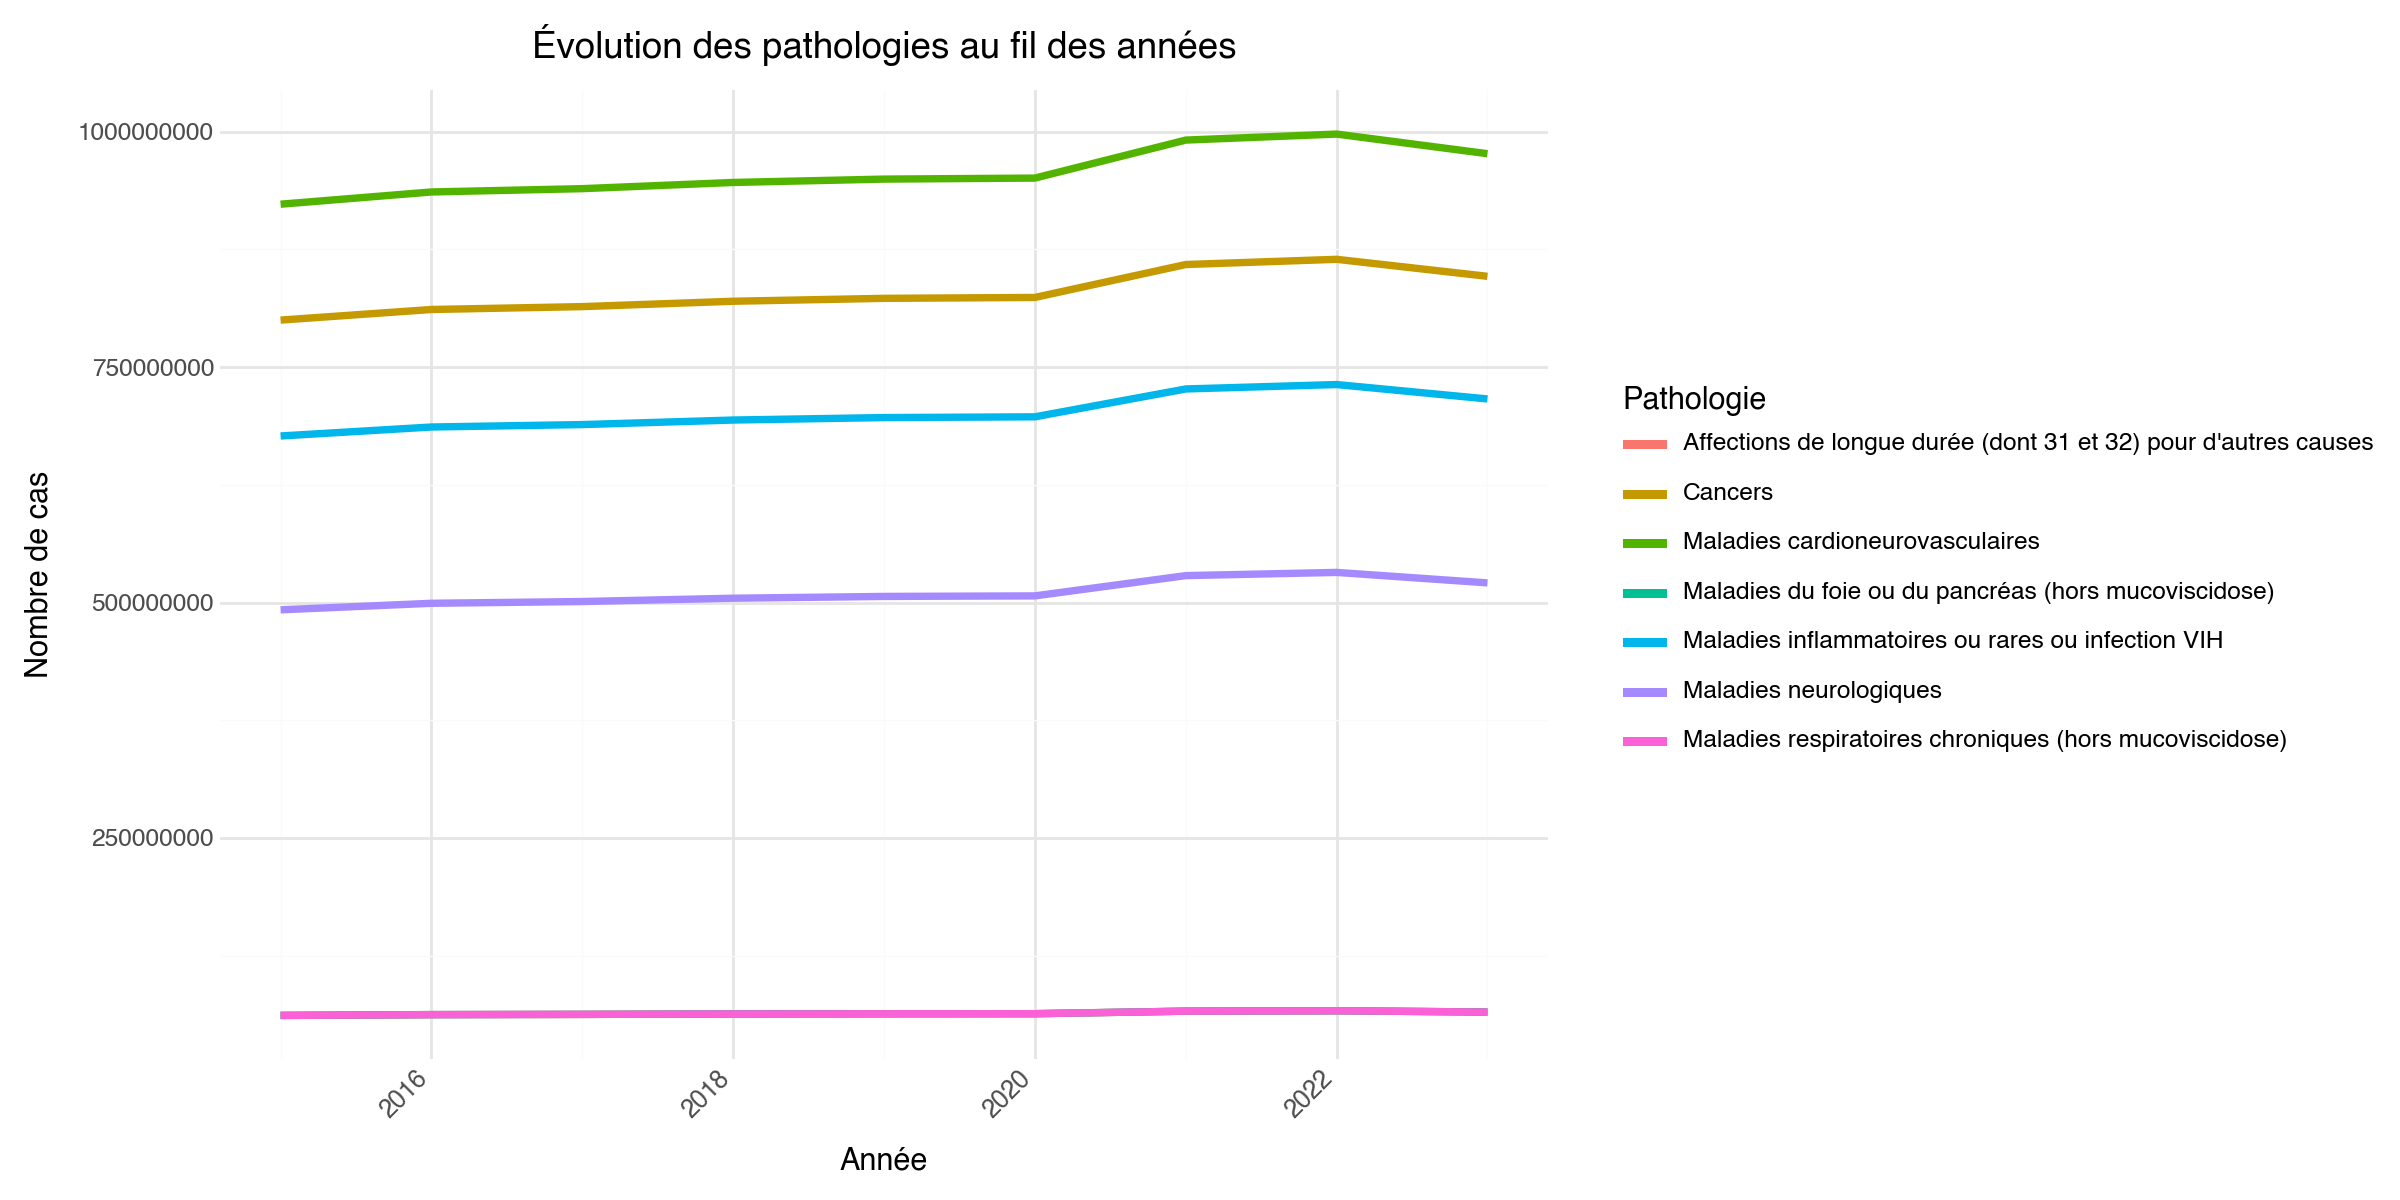

In [198]:
(
    ggplot(year_patho, aes(x='annee', y='Npop', color='patho_niv1', group='patho_niv1')) +
    geom_line(size=1.5) +
    labs(
        title='Évolution des pathologies au fil des années',
        x='Année',
        y='Nombre de cas',
        color='Pathologie'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)

A discuter avec JULIA mais je pense que l'on doit supprime Affection de longue durée 

In [199]:
foie_by_year = (
    Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == 'Maladies du foie ou du pancréas (hors mucoviscidose)']
    .groupby('annee')['Npop']
    .sum()
    .reset_index()
)

print(foie_by_year)


   annee      Npop
0   2015  63388350
1   2016  64287620
2   2017  64546860
3   2018  64991840
4   2019  65240930
5   2020  65299260
6   2021  68084040
7   2022  68558140
8   2023  67123680


In [200]:
foie_by_dept = (
    Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == 'Maladies du foie ou du pancréas (hors mucoviscidose)']
    .groupby('dept')['Npop']
    .sum()
    .reset_index()
)

print(foie_by_dept)


    dept     Npop
0     01  5473410
1     02  4639240
2     03  2945460
3     04  1462440
4     05  1253690
..   ...      ...
96   971  3449280
97   972  3239570
98   973  1752630
99   974  8128940
100  976   971130

[101 rows x 2 columns]


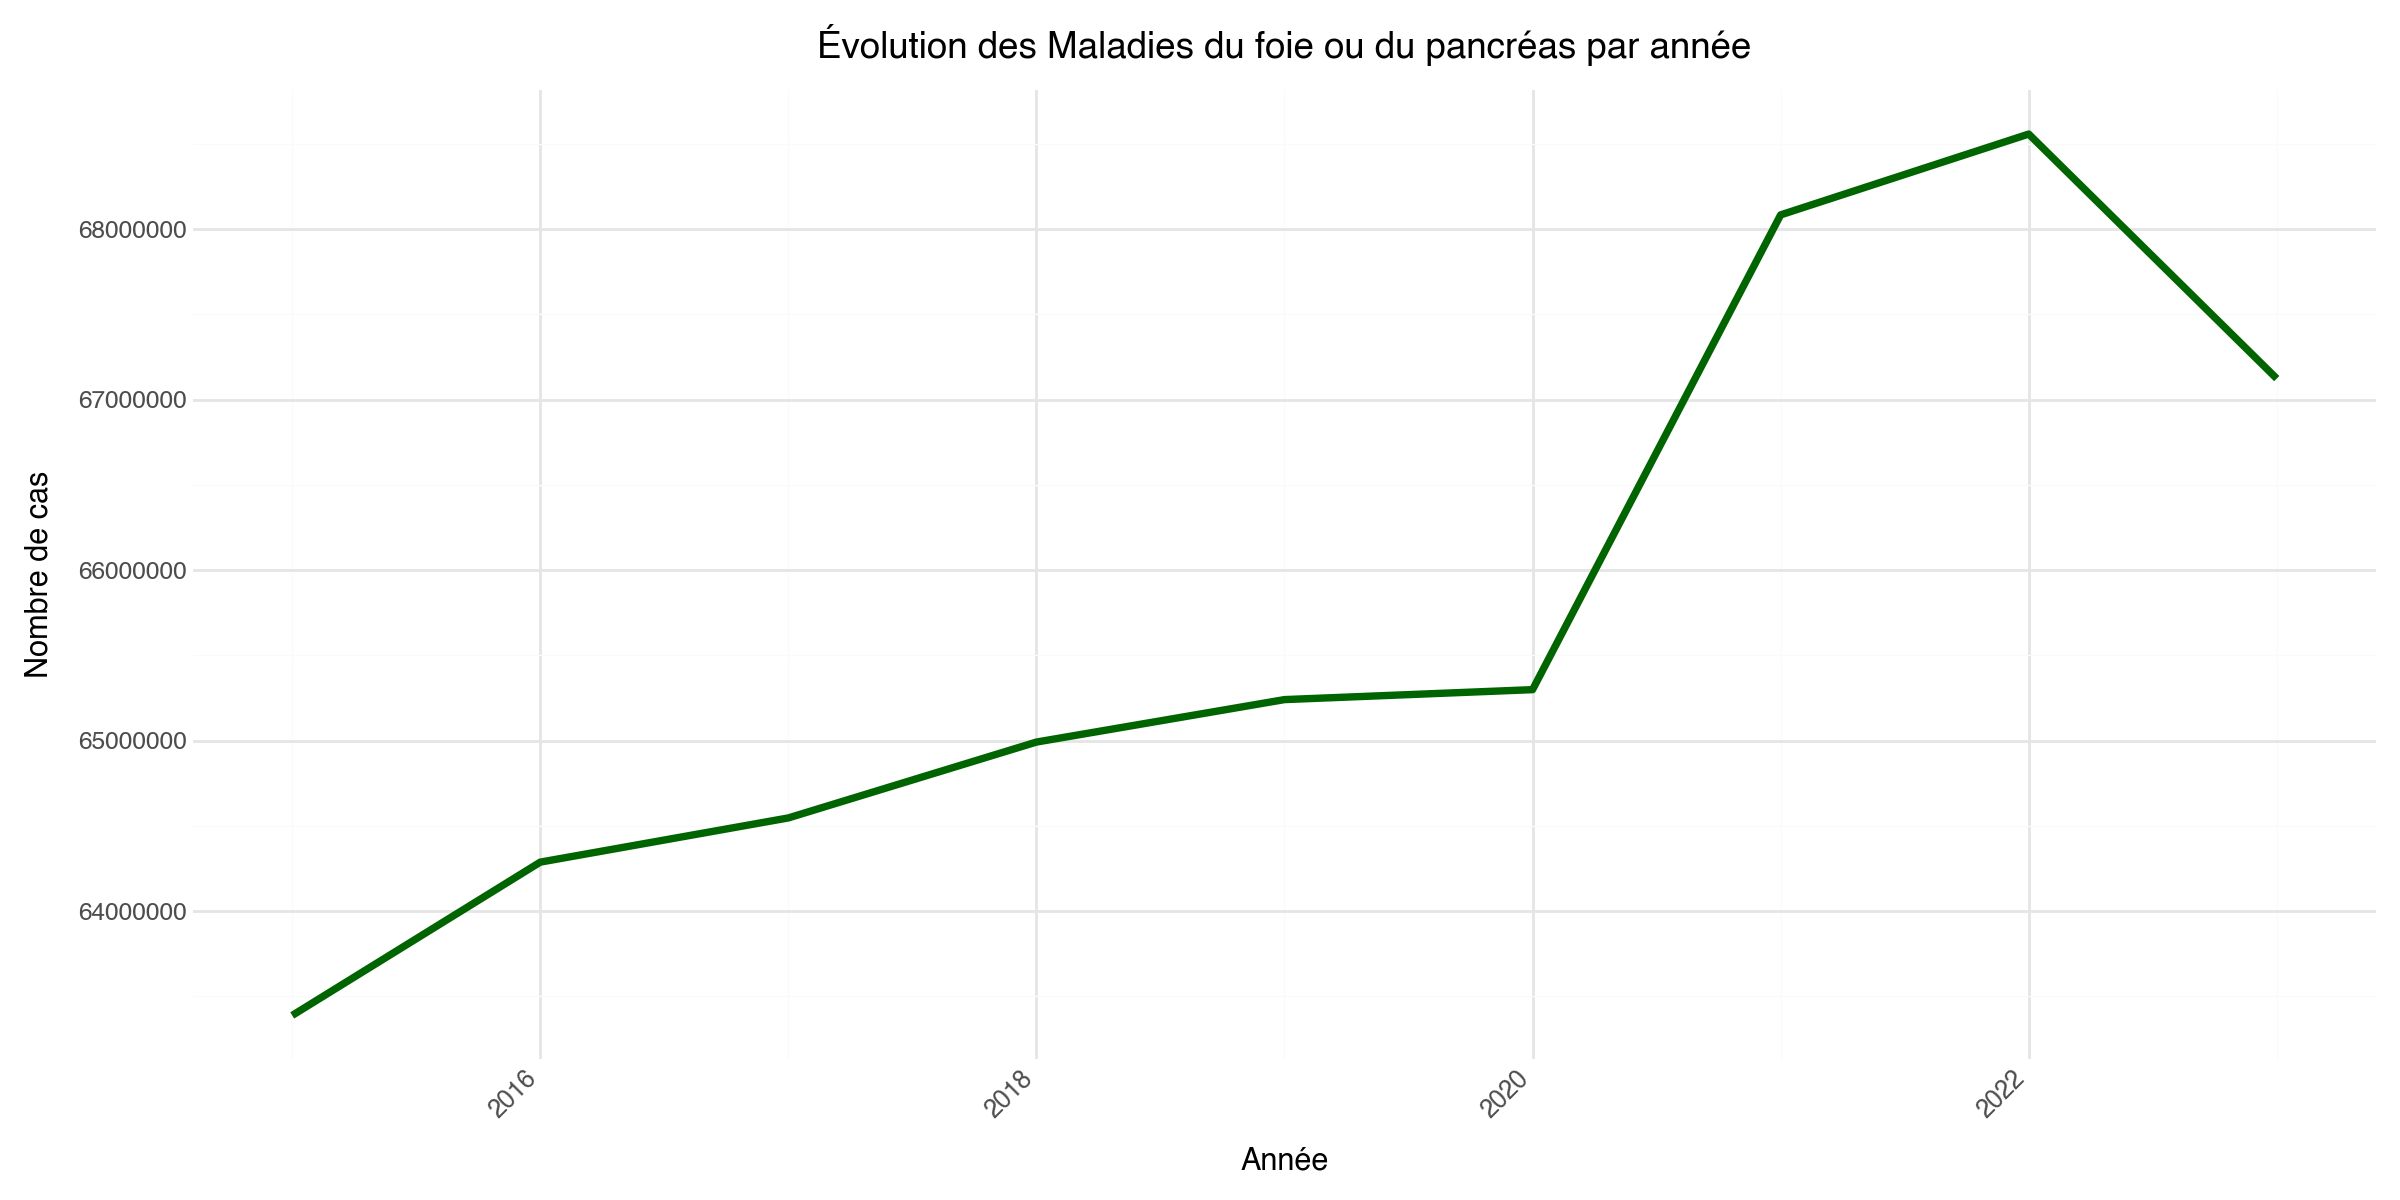

In [201]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme, element_text

# Line plot
(
    ggplot(foie_by_year, aes(x='annee', y='Npop')) +
    geom_line(size=1.5, color='darkgreen') +
    labs(
        title='Évolution des Maladies du foie ou du pancréas par année',
        x='Année',
        y='Nombre de cas'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)


In [204]:
affection_by_year = (
    Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == "Affections de longue durée (dont 31 et 32) pour d'autres causes"]
    .groupby('annee')['Npop']
    .sum()
    .reset_index()
)

print(affection_by_year)


   annee      Npop
0   2015  63388350
1   2016  64287620
2   2017  64546860
3   2018  64991840
4   2019  65240930
5   2020  65299260
6   2021  68084040
7   2022  68558140
8   2023  67123680


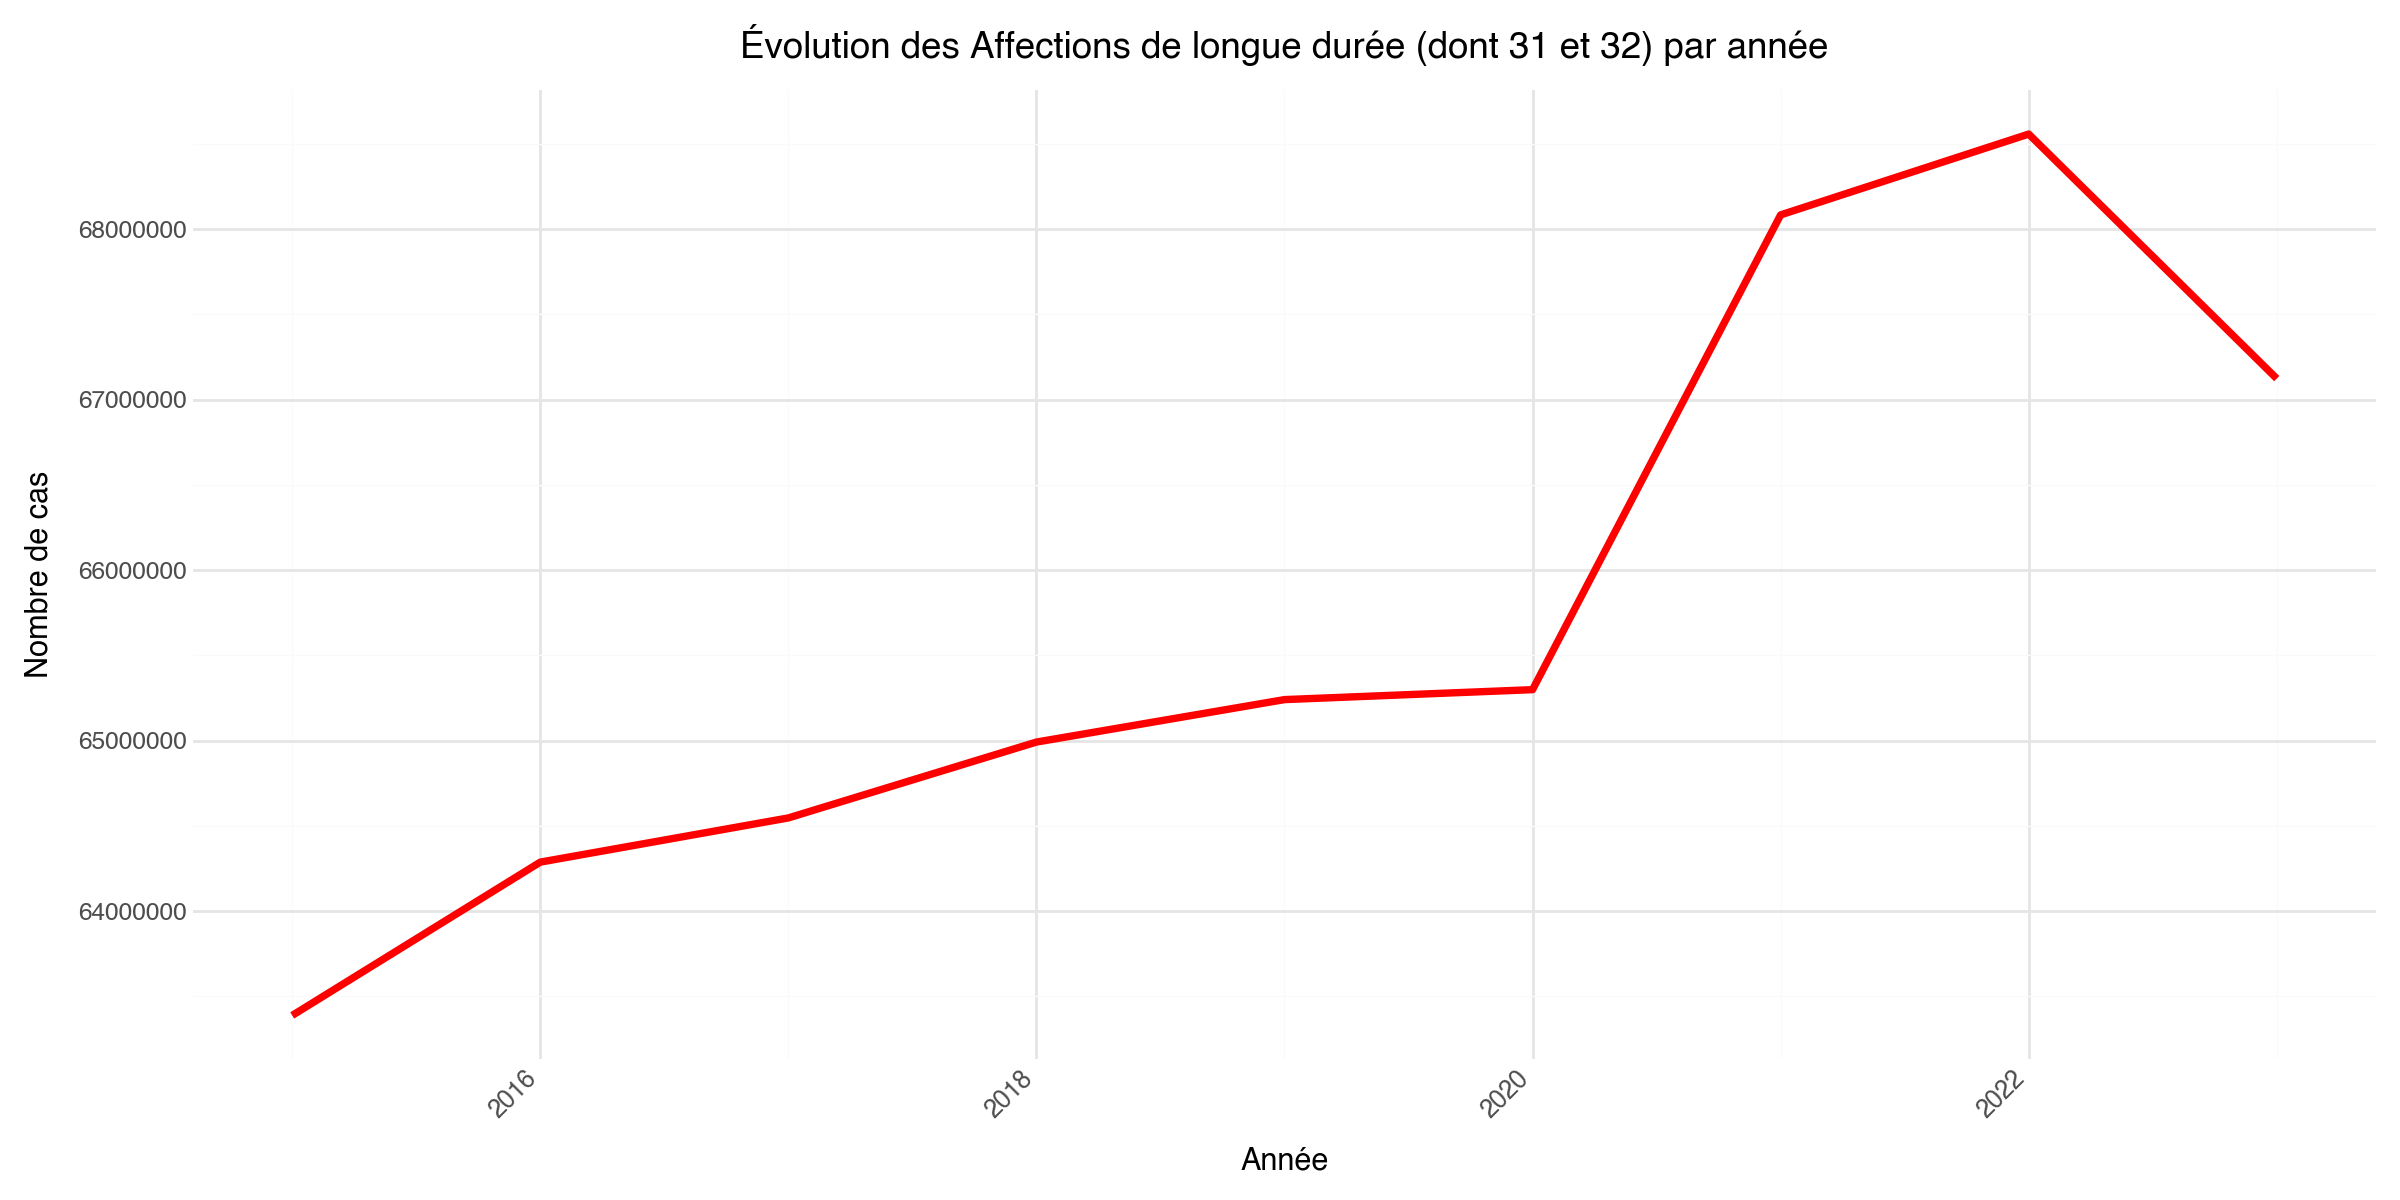

In [205]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme, element_text

# Line plot
(
    ggplot(affection_by_year, aes(x='annee', y='Npop')) +
    geom_line(size=1.5, color='red') +
    labs(
        title="Évolution des Affections de longue durée (dont 31 et 32) par année",
        x='Année',
        y='Nombre de cas'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)


In [206]:
respiratoires_by_year = (
    Patho_filtre_clean[Patho_filtre_clean['patho_niv1'] == 'Maladies respiratoires chroniques (hors mucoviscidose)']
    .groupby('annee')['Npop']
    .sum()
    .reset_index()
)

print(respiratoires_by_year)


   annee      Npop
0   2015  63388350
1   2016  64287620
2   2017  64546860
3   2018  64991840
4   2019  65240930
5   2020  65299260
6   2021  68084040
7   2022  68558140
8   2023  67123680


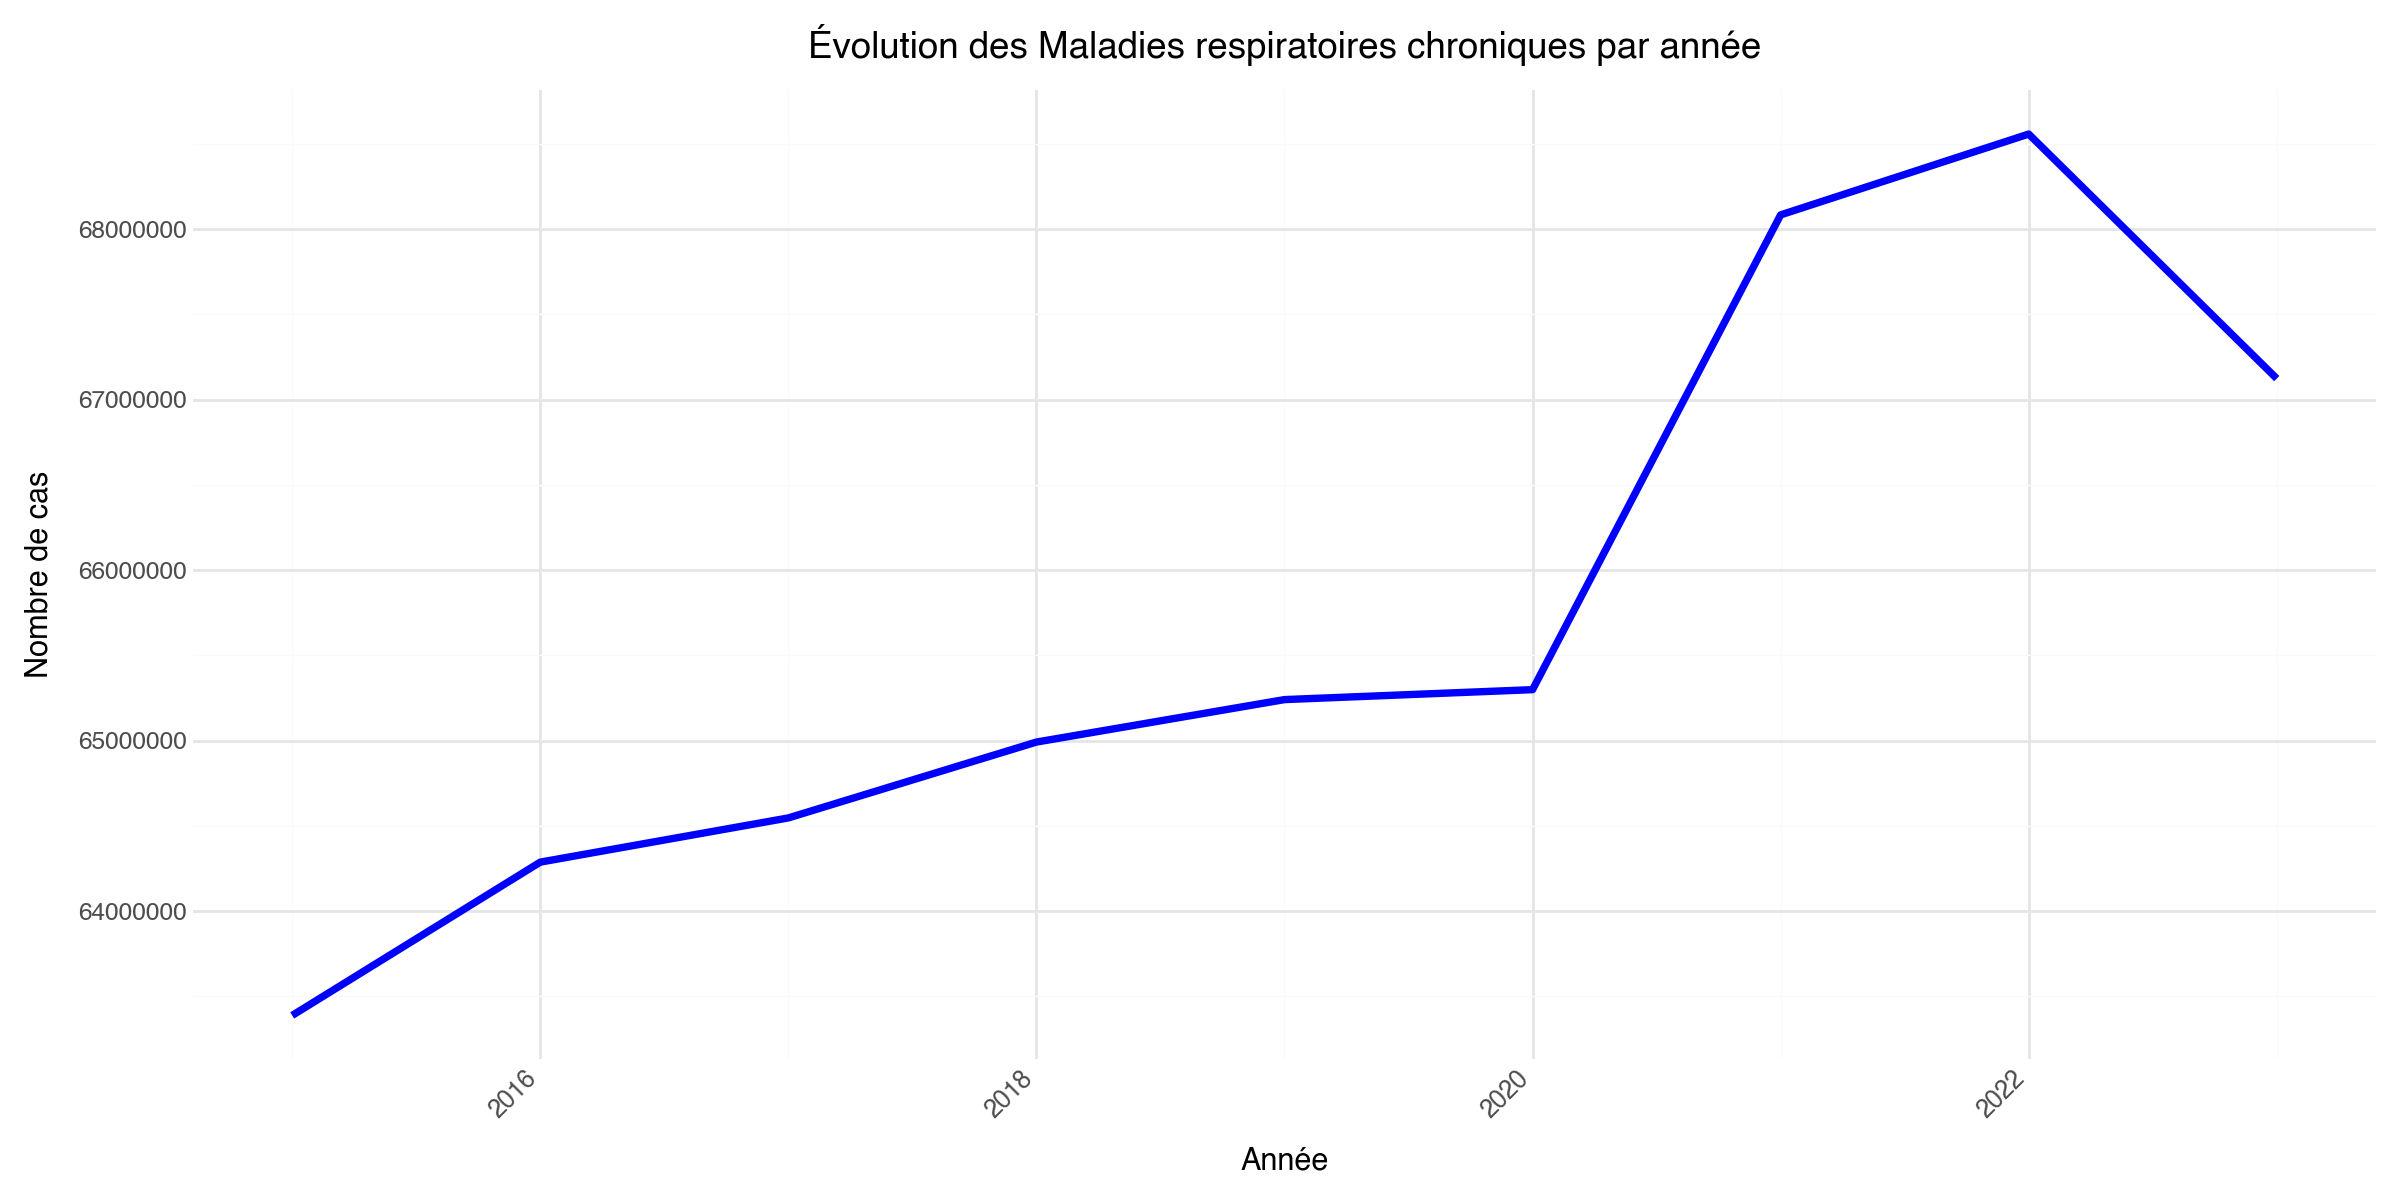

In [207]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, theme, element_text

# Line plot
(
    ggplot(respiratoires_by_year, aes(x='annee', y='Npop')) +
    geom_line(size=1.5, color='blue') +
    labs(
        title='Évolution des Maladies respiratoires chroniques par année',
        x='Année',
        y='Nombre de cas'
    ) +
    theme_minimal() +
    theme(
        figure_size=(12,6),
        axis_text_x=element_text(rotation=45, ha='right', size=9)
    )
)


In [208]:
# Combien de lignes par combinaison unique pathologie/année/dept
Patho_filtre_clean.groupby(['annee','dept','patho_niv1']).size().sort_values(ascending=False)


annee  dept  patho_niv1                                                     
2017   73    Maladies cardioneurovasculaires                                    600
2023   59    Maladies cardioneurovasculaires                                    600
2015   972   Maladies cardioneurovasculaires                                    600
2022   11    Maladies cardioneurovasculaires                                    600
2019   42    Maladies cardioneurovasculaires                                    600
                                                                               ... 
       23    Maladies du foie ou du pancréas (hors mucoviscidose)                40
             Maladies respiratoires chroniques (hors mucoviscidose)              40
       24    Affections de longue durée (dont 31 et 32) pour d'autres causes     40
             Maladies du foie ou du pancréas (hors mucoviscidose)                40
2023   976   Maladies respiratoires chroniques (hors mucoviscidose)              40

In [209]:
Patho_filtre_clean.duplicated(subset=['annee','dept','patho_niv1','Npop']).sum()


np.int64(1569234)

PROBLEME AVEC LES ANNEES
inter-pathologie est invalide 
MAIS LE INTRA PATHO PEUT ETRE INETRESSANT 

SEXE RIEN A REMARQUER, OK 

In [212]:
Patho_filtre

,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
6,2023,Maladies cardioneurovasculaires,75-79,1,11,75,35700
7,2023,Maladies cardioneurovasculaires,75-79,1,11,91,19270
8,2023,Maladies cardioneurovasculaires,75-79,1,11,94,19500
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [213]:
maladie_year = (
    Patho_filtre_clean
    .groupby(['annee','patho_niv1'])['Npop']
    .sum()
    .reset_index()
)


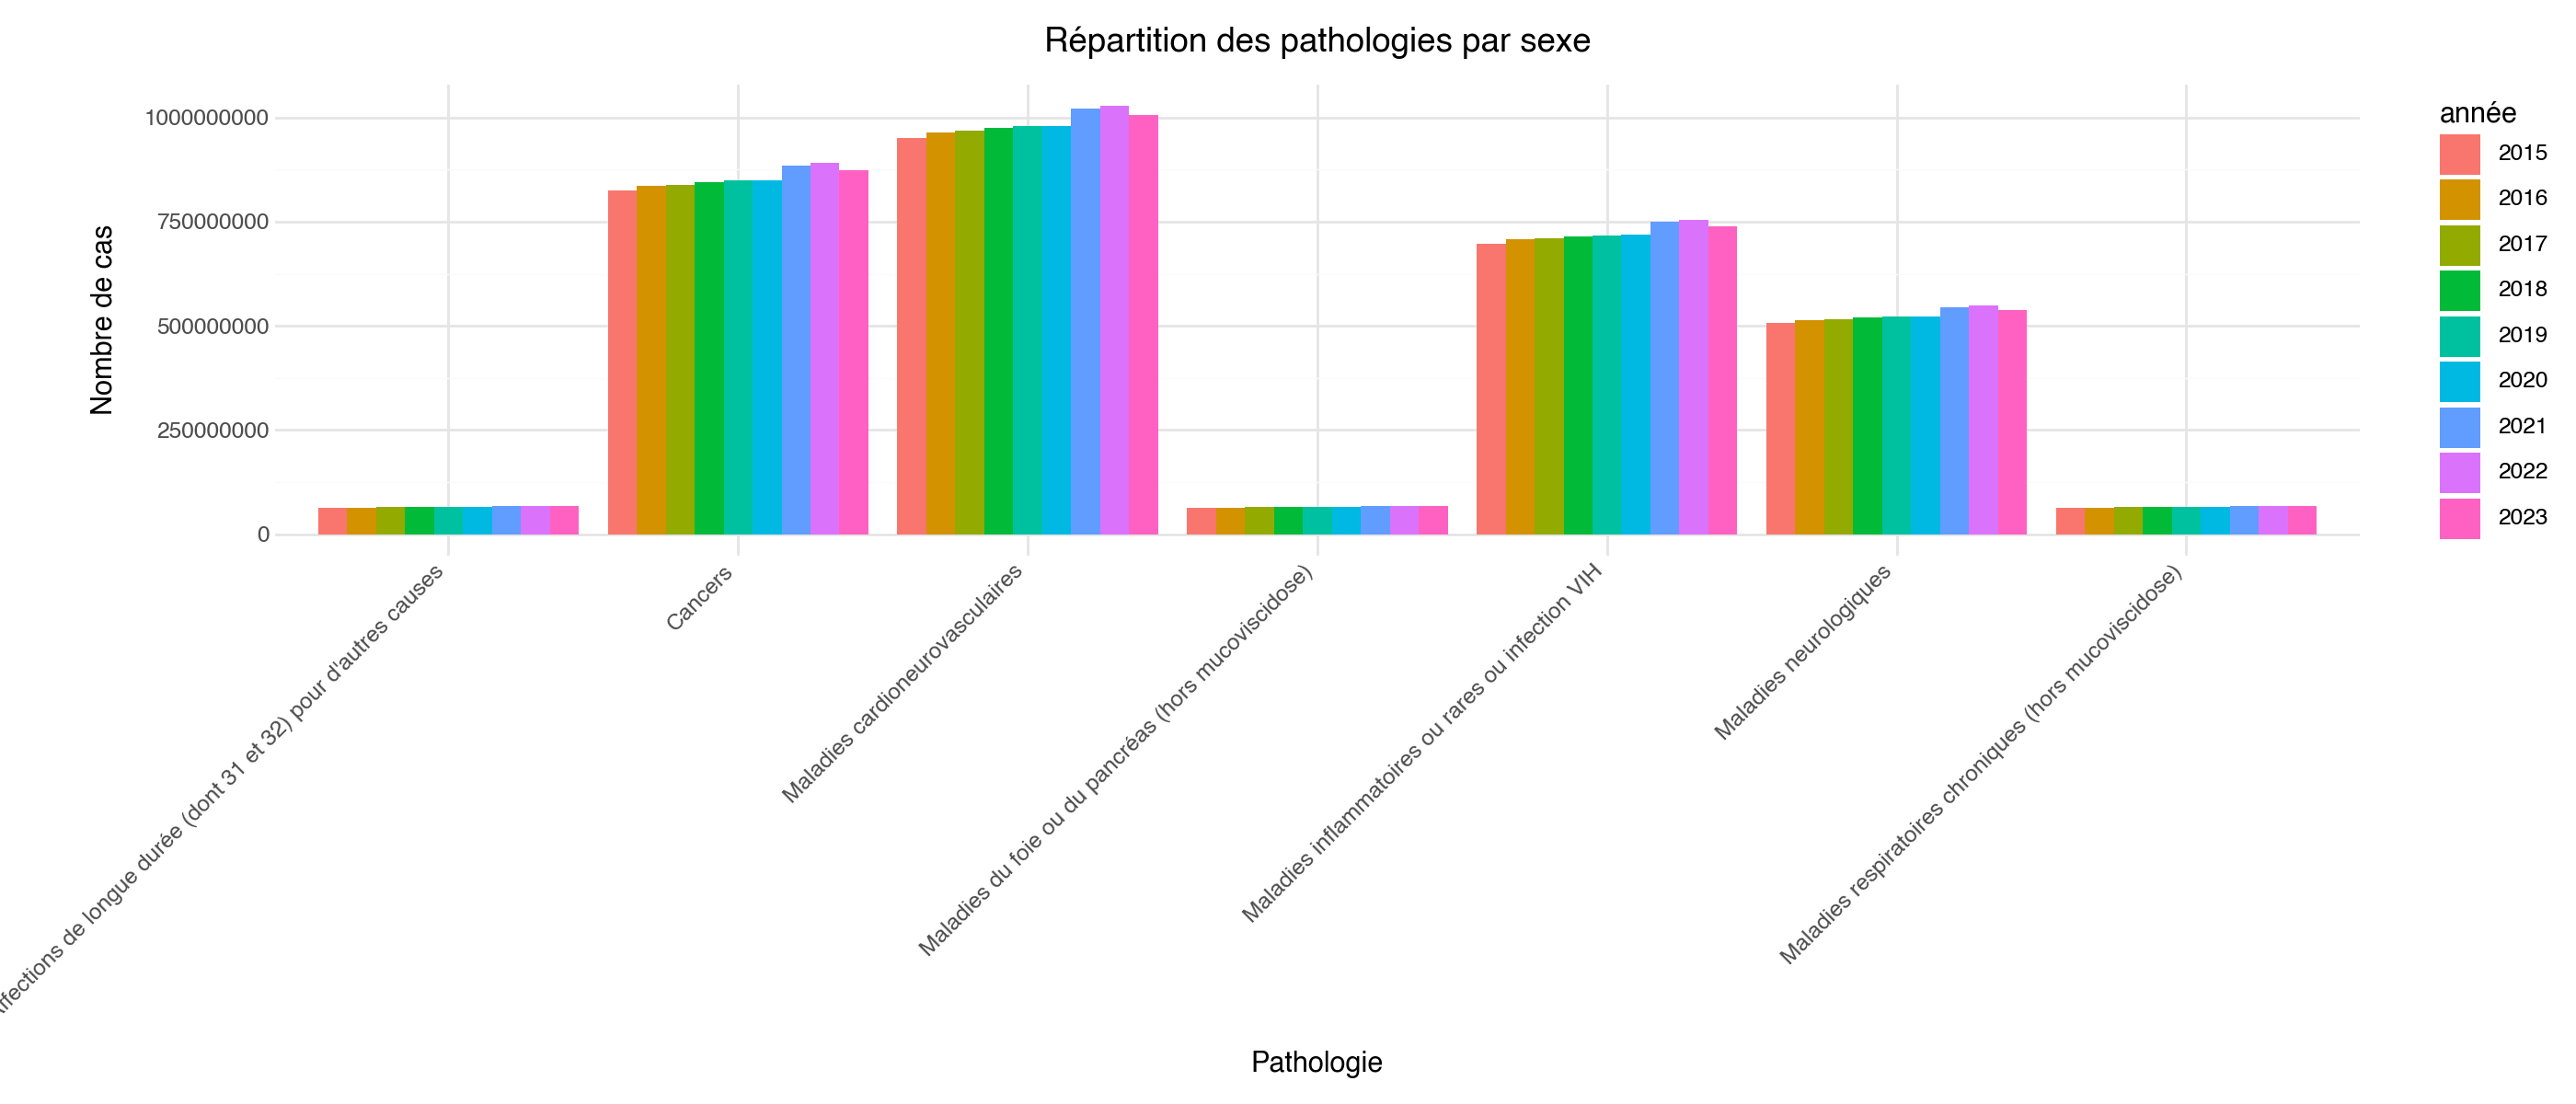

In [214]:
(
    ggplot(maladie_year, aes(x='patho_niv1', y='Npop', fill='factor(annee)')) +
    geom_bar(stat='identity', position='dodge') +  # barres côte à côte
    labs(
        title='Répartition des pathologies par sexe',
        x='Pathologie',
        y='Nombre de cas',
        fill='année'
    ) +
    theme_minimal() +
    theme(
        figure_size=(14,6),
        axis_text_x=element_text(rotation=45, ha='right')
    )
)


CA A REDISCUTER CAR MOINS DE 10 ans et là c'est correecte 

UNSUPERVIDED LEARNING 

In [215]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Pivot : chaque département devient une ligne, chaque pathologie une colonne
df_pivot = Patho_filtre_clean.pivot_table(
    index='dept',
    columns='patho_niv1',
    values='Npop',
    aggfunc='sum',
    fill_value=0
)

print(df_pivot.head())


patho_niv1  Affections de longue durée (dont 31 et 32) pour d'autres causes  \
dept                                                                          
01                                                    5473410                 
02                                                    4639240                 
03                                                    2945460                 
04                                                    1462440                 
05                                                    1253690                 

patho_niv1   Cancers  Maladies cardioneurovasculaires  \
dept                                                    
01          71154330                         82101150   
02          60310120                         69588600   
03          38290980                         44181900   
04          19011720                         21936600   
05          16297970                         18805350   

patho_niv1  Maladies du foie ou du pancréas (h

In [216]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)


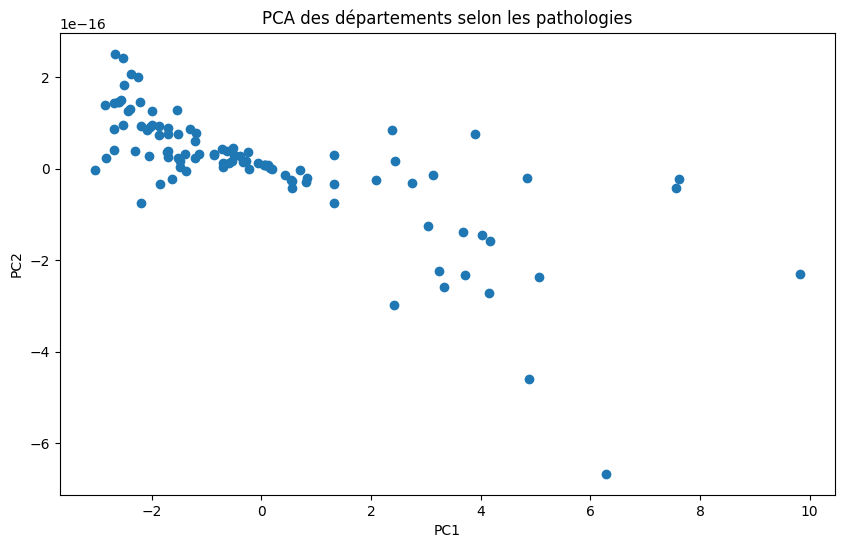

In [217]:
pca = PCA(n_components=2)  # 2 composantes principales pour visualiser
X_pca = pca.fit_transform(X_scaled)

# Pour visualiser
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA des départements selon les pathologies')
plt.show()


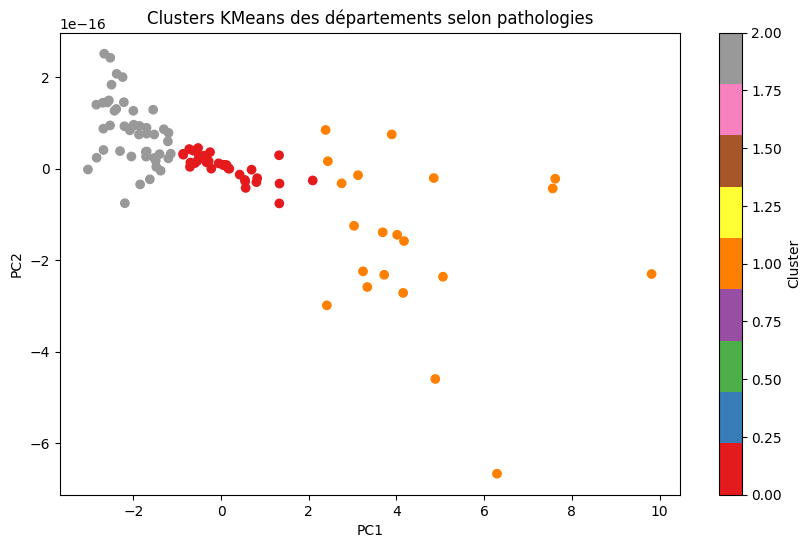

In [218]:
kmeans = KMeans(n_clusters=3, random_state=42)  # par exemple 3 clusters
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df_pivot['cluster'] = clusters

# Visualiser PCA + clusters
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters KMeans des départements selon pathologies')
plt.colorbar(label='Cluster')
plt.show()
